# About the Dataset:

The dataset used in the task OffensEval is the Offensive Language Identification Dataset (OLID) . This dataset was created specifically for this task. It contains 14,100 English tweets, 13,240 provided as the training data and 860 as the testing data. 

Twitter user mentions were substituted by @USER and URLs have been substitute by URL.

OLID is annotated using a hierarchical annotation. Each instance contains up to 3 labels each corresponding to one of the following levels:

- Level (or sub-task) A: Offensive language identification; 

- Level (or sub-task) B: Automatic categorization of offense types;

- Level (or sub-task) C: Offense target identification.


## Columns:


### **1. del**

-   **Description**: This column is index. A identifier.

### **2. id**

-   **Description**: This column represents a **unique identifier** for each social media post (tweet). It is typically a string or integer value that uniquely distinguishes each entry in your dataset.
-   **Purpose**: This column is useful for identifying individual posts or when you need to track a specific tweet for analysis, especially if you are working with a large dataset.

### **3. tweet**

-   **Description**: This column contains the **text content** of the tweet, which represents the actual post made by the user.
-   **Purpose**: This is the core content that you will analyze to determine whether the tweet is offensive, and if so, what type of offense it is. You can perform various NLP tasks on this text data, such as tokenization, sentiment analysis, and text classification.

### **4. subtask_a**

-   **Description**: This is a **binary classification** column indicating whether the tweet is offensive or not.
    -   **Values**:
        -   NOT: The tweet is **not offensive**.
        -   OFF: The tweet is **offensive**, including insults, threats, or untargeted profanity.
-   **Purpose**: This column is essential for identifying the general nature of the tweet (offensive or non-offensive) and is typically used as the target variable in binary classification tasks.

### **5. subtask_b**

-   **Description**: For tweets labeled as "Offensive" in **subtask_a**, this column classifies the type of offense.
    -   **Values**:
        -   TIN: **Targeted Insult** — The offensive tweet is aimed at a specific individual or group.
        -   UNT: **Untargeted** — The tweet contains profanity or offensive language but is not aimed at any specific individual or group.
-   **Purpose**: This column further refines the categorization of offensive tweets. You would use this in a multi-class classification task to distinguish between different types of offensive content (targeted vs. untargeted).

### **6. subtask_c**

-   **Description**: For tweets labeled as "Targeted Insult" in **subtask_b**, this column specifies the **offense target**.
    -   **Values**:
        -   IND: **Individual** — The offensive content targets a specific individual.
        -   GRP: **Group** — The offensive content targets a specific group, community, or demographic.
        -   OTH: **Others** — The offensive content targets entities like organizations, institutions, or general concepts.
-   **Purpose**: This column helps further categorize tweets labeled as "Targeted Insult" into more specific categories, enabling more granular analysis of offensive content based on the target.

### **7. cleaned_tweet**

-   **Description**: This column contains the **cleaned version** of the tweet text. Cleaning typically involves removing stop words, special characters, hashtags, mentions, URLs, and other non-essential elements that do not contribute to the meaning of the tweet.
-   **Purpose**: The cleaned tweet is used for NLP tasks such as text classification, sentiment analysis, or topic modeling, where the raw tweet text might have irrelevant or noisy elements that could hinder model performance.

----------

### **Summary Table of Columns:**

| **Column Name**   | **Description**                                           | **Example (Row 1)**                                                           | **Example (Row 2)**                                                           |
|-------------------|-----------------------------------------------------------|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
| **`del`**         | Identifier or meta information (unclear)                  | `86426`                                                                       | `90194`                                                                       |
| **`id`**          | Unique identifier for each tweet                          | `86426`                                                                       | `90194`                                                                       |
| **`tweet`**       | Raw text content of the tweet                             | `@USER She should ask a few native Americans what their take on this is.`     | `@USER @USER Go home youâ€™re drunk!!! @USER #MAGA #Trump2020 ðŸ‘ŠðŸ‡ºðŸ‡¸ðŸ‘Š URL` |
| **`subtask_a`**   | Offensive or non-offensive classification                  | `OFF`                                                                          | `OFF`                                                                          |
| **`subtask_b`**   | Type of offense (Targeted Insult or Untargeted)           | `UNT`                                                                          | `TIN`                                                                          |
| **`subtask_c`**   | Target of offense (Individual, Group, or Other)           | (Empty, as the offense is untargeted)                                          | `IND`                                                                          |
| **`cleaned_tweet`** | Cleaned version of the tweet text                          | `ask native americans take`                                                   | `home drunk url`                                                              |


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
df = pd.read_csv('cleaned_train_data_v0.csv')
df.head()

del     id                                              tweet subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...       OFF   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...       OFF   
2    2  16820  Amazon is investigating Chinese employees who ...       NOT   
3    3  62688  @USER Someone should'veTaken" this piece of sh...       OFF   
4    4  43605  @USER @USER Obama wanted liberals &amp; illega...       NOT   

  subtask_b subtask_c                                      cleaned_tweet  
0       UNT       NaN                          ask native americans take  
1       TIN       IND                                     home drunk url  
2       NaN       NaN  amazon investigating chinese employees selling...  
3       UNT       NaN                 someone vetaken piece shit volcano  
4       NaN       NaN     obama wanted liberals illegals move red states

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   del            13240 non-null  int64 
 1   id             13240 non-null  int64 
 2   tweet          13240 non-null  object
 3   subtask_a      13240 non-null  object
 4   subtask_b      4400 non-null   object
 5   subtask_c      3876 non-null   object
 6   cleaned_tweet  13156 non-null  object
dtypes: int64(2), object(5)
memory usage: 724.2+ KB


In [261]:
print(df.isnull().sum())

del                 0
id                  0
tweet               0
subtask_a           0
subtask_b        8840
subtask_c        9364
cleaned_tweet      84
dtype: int64


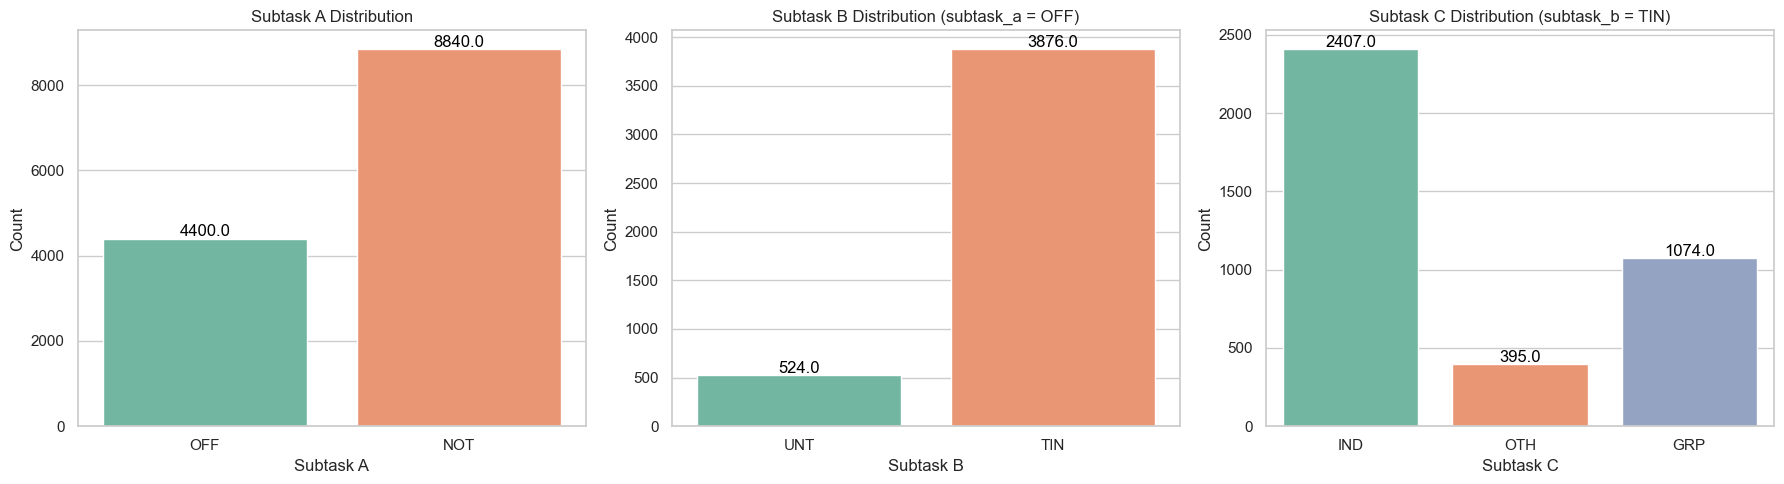

In [262]:
# Set up seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subtask A distribution
ax1 = sns.countplot(x='subtask_a', data=df, ax=axes[0], hue='subtask_a', palette='Set2', legend=False)
axes[0].set_title('Subtask A Distribution')
axes[0].set_xlabel('Subtask A')
axes[0].set_ylabel('Count')

# Annotate values on top of bars for subtask_a
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Subtask B distribution when subtask A is OFF
ax2 = sns.countplot(x='subtask_b', data=df[df['subtask_a'] == 'OFF'], ax=axes[1], hue='subtask_b', palette='Set2', legend=False)
axes[1].set_title('Subtask B Distribution (subtask_a = OFF)')
axes[1].set_xlabel('Subtask B')
axes[1].set_ylabel('Count')

# Annotate values on top of bars for subtask_b
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Subtask C distribution when subtask B is TIN
ax3 = sns.countplot(x='subtask_c', data=df[df['subtask_b'] == 'TIN'], ax=axes[2], hue='subtask_c', palette='Set2', legend=False)
axes[2].set_title('Subtask C Distribution (subtask_b = TIN)')
axes[2].set_xlabel('Subtask C')
axes[2].set_ylabel('Count')

# Annotate values on top of bars for subtask_c
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Adjust layout for better readability
plt.tight_layout()
plt.savefig("./Analysis_Dashboard/figures/distribution.png")
plt.show()

In [263]:
import nltk

In [264]:
df['subtask_a'] = pd.get_dummies(df['subtask_a'], drop_first=True).astype(int)

mapping = {np.nan:0,'UNT':1,'TIN':2}
df['subtask_b'] = df['subtask_b'].map(mapping)

mapping = {np.nan: 0, 'IND': 1, 'OTH': 2, 'GRP': 3}
df['subtask_c'] = df['subtask_c'].map(mapping)

df.head()

del     id                                              tweet  subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...          1   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...          1   
2    2  16820  Amazon is investigating Chinese employees who ...          0   
3    3  62688  @USER Someone should'veTaken" this piece of sh...          1   
4    4  43605  @USER @USER Obama wanted liberals &amp; illega...          0   

   subtask_b  subtask_c                                      cleaned_tweet  
0          1          0                          ask native americans take  
1          2          1                                     home drunk url  
2          0          0  amazon investigating chinese employees selling...  
3          1          0                 someone vetaken piece shit volcano  
4          0          0     obama wanted liberals illegals move red states

In [265]:
def search_tweets_with_word(word):
    # Filter the dataset into two subsets: 'hate' and 'not hate' based on subtask_a
    hate_tweets = df_filtered[df_filtered['subtask_a'] == 1]  # Assuming 1 represents 'hate'
    non_hate_tweets = df_filtered[df_filtered['subtask_a'] == 0]  # Assuming 0 represents 'non-hate'
    
    
    # Specific word to search for
    word_to_search = word
    
    # Check for the presence of the word in 'hate' and 'non-hate' tweets
    hate_tweets_containing_word = hate_tweets[hate_tweets['cleaned_tweet'].str.contains(word_to_search, case=False)]
    non_hate_tweets_containing_word = non_hate_tweets[non_hate_tweets['cleaned_tweet'].str.contains(word_to_search, case=False)]
    
    # Display the count of tweets containing the word
    print(f"Hate tweets containing '{word_to_search}': {len(hate_tweets_containing_word)}")
    print(f"Non-hate tweets containing '{word_to_search}': {len(non_hate_tweets_containing_word)}")
    
    return hate_tweets_containing_word
tw  = search_tweets_with_word('gun')


Hate tweets containing 'gun': 9
Non-hate tweets containing 'gun': 22


In [266]:
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str)

df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'\b(url|user)\b', '', regex=True)
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'[^\w\s]', '', regex=True)
df['cleaned_tweet'] = df['cleaned_tweet'].str.lower()

### Remove stopwords

In [267]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
    words = sentence.split()
    filtered = ' '.join(word for word in words if word not in stop_words)
    return filtered
    
df['stopped'] = df['cleaned_tweet'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Stemming

In [268]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def stem_sentence(sentence):
    words = str(sentence).split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['stemmed_tweet'] = df['cleaned_tweet'].apply(stem_sentence)

In [269]:
df.head()

del     id                                              tweet  subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...          1   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...          1   
2    2  16820  Amazon is investigating Chinese employees who ...          0   
3    3  62688  @USER Someone should'veTaken" this piece of sh...          1   
4    4  43605  @USER @USER Obama wanted liberals &amp; illega...          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          1          0                          ask native americans take   
1          2          1                                        home drunk    
2          0          0  amazon investigating chinese employees selling...   
3          1          0                 someone vetaken piece shit volcano   
4          0          0     obama wanted liberals illegals move red states   

                                             stopped  \
0                          ask native americans take   
1                                         home drunk   
2  amazon investigating chinese employees selling...   
3                 someone vetaken piece shit volcano   
4     obama wanted liberals illegals move red states   

                                       stemmed_tweet  
0                            ask nativ american take  
1                                         home drunk  
2  amazon investig chines employe sell intern dat...  
3                   someon vetaken piec shit volcano  
4              obama want liber illeg move red state

### Lemmatization

In [270]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    words = str(sentence).split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['lemmatized_tweet'] = df['cleaned_tweet'].apply(lemmatize_sentence)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HARI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


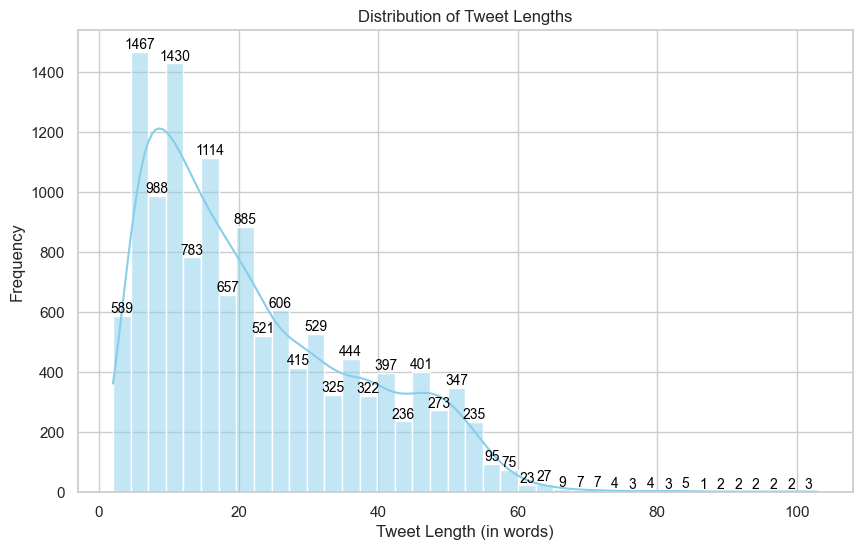

In [271]:
# Calculate tweet lengths
df['tweet_length'] = df['tweet'].apply(lambda x: len(x.split()))

# Create a histogram plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['tweet_length'], bins=40, kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (in words)')
plt.ylabel('Frequency')

# Annotate values on top of bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = height
    ax.annotate(f'{height}', (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.savefig("./Analysis_Dashboard/figures/distribution_of_tweet_lengths.png")
plt.show()

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   del               13240 non-null  int64 
 1   id                13240 non-null  int64 
 2   tweet             13240 non-null  object
 3   subtask_a         13240 non-null  int32 
 4   subtask_b         13240 non-null  int64 
 5   subtask_c         13240 non-null  int64 
 6   cleaned_tweet     13240 non-null  object
 7   stopped           13240 non-null  object
 8   stemmed_tweet     13240 non-null  object
 9   lemmatized_tweet  13240 non-null  object
 10  tweet_length      13240 non-null  int64 
dtypes: int32(1), int64(5), object(5)
memory usage: 1.1+ MB


In [273]:
df_copy = df.copy()
df = df_copy

In [274]:
# Example list of words to remove from the tweets
words_to_remove = ['trump', 'antifa', 'liberal', 'conservative', 'gun control', 'know', 'one', 'people', 'nan']

# Create a condition to check if any of the words_to_remove are in the 'cleaned_tweet' column
condition = df['lemmatized_tweet'].apply(lambda x: not any(word in x.lower() for word in words_to_remove))


# Create a new DataFrame based on the condition
df_filtered = df[condition].copy()
# Drop rows where 'lemmatized_tweet' is NaN or not a string
df_filtered = df_filtered[df_filtered['lemmatized_tweet'].apply(lambda x: isinstance(x, str))]

# Alternatively, you can drop rows with NaN values directly
df_filtered = df_filtered.dropna(subset=['lemmatized_tweet'])

# Show the new DataFrame
df_filtered.head()


del     id                                              tweet  subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...          1   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...          1   
2    2  16820  Amazon is investigating Chinese employees who ...          0   
6    6  77444                   @USER @USER Oh noes! Tough shit.          1   
8    8  45157                         @USER Buy more icecream!!!          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          1          0                          ask native americans take   
1          2          1                                        home drunk    
2          0          0  amazon investigating chinese employees selling...   
6          1          0                                    noes tough shit   
8          0          0                                       buy icecream   

                                             stopped  \
0                          ask native americans take   
1                                         home drunk   
2  amazon investigating chinese employees selling...   
6                                    noes tough shit   
8                                       buy icecream   

                                       stemmed_tweet  \
0                            ask nativ american take   
1                                         home drunk   
2  amazon investig chines employe sell intern dat...   
6                                     noe tough shit   
8                                       buy icecream   

                                    lemmatized_tweet  tweet_length  
0                           ask native american take            14  
1                                         home drunk            11  
2  amazon investigating chinese employee selling ...            27  
6                                      no tough shit             6  
8                                       buy icecream             4

### TF-IDF Vectorization:

      000  0589  07405077156  100  1000  1001  101  106m  10kg  10kids  ...  \
0     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
1     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
2     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
3     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
4     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
...   ...   ...          ...  ...   ...   ...  ...   ...   ...     ...  ...   
6872  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
6873  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
6874  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
6875  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
6876  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   

      zim  zimmerman  zina  zionist  zipcode  zodia

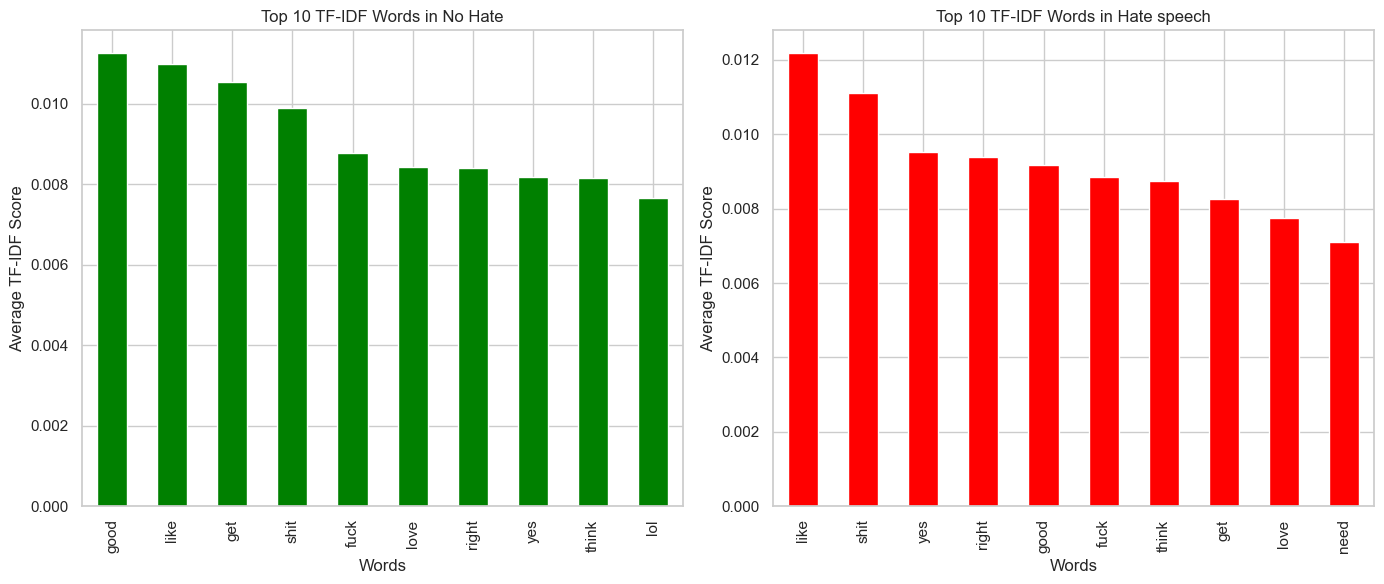

In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered['lemmatized_tweet'])

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array and display it
tfidf_array = tfidf_matrix.toarray()

# Show the TF-IDF scores for the words in the reviews
positive_reviews = df_filtered[df_filtered['subtask_a'] == 0]['lemmatized_tweet']
negative_reviews = df_filtered[df_filtered['subtask_a'] == 1]['lemmatized_tweet']

# Convert reviews to TF-IDF vectors
positive_tfidf = tfidf_vectorizer.fit_transform(positive_reviews).toarray()
negative_tfidf = tfidf_vectorizer.fit_transform(negative_reviews).toarray()
df_tfidf = pd.DataFrame(tfidf_array, columns=feature_names)
print(df_tfidf)

# Separate the TF-IDF matrix for positive and negative reviews
positive_tfidf = df_tfidf.iloc[:len(positive_reviews)]
negative_tfidf = df_tfidf.iloc[len(positive_reviews):]

# Visualize the average TF-IDF score for the top 10 words in positive vs. negative reviews
avg_positive_tfidf = positive_tfidf.mean(axis=0).sort_values(ascending=False).head(10)
avg_negative_tfidf = negative_tfidf.mean(axis=0).sort_values(ascending=False).head(10)

# Plot the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

avg_positive_tfidf.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title("Top 10 TF-IDF Words in No Hate")
axes[0].set_xlabel("Words")
axes[0].set_ylabel("Average TF-IDF Score")

avg_negative_tfidf.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title("Top 10 TF-IDF Words in Hate speech")
axes[1].set_xlabel("Words")
axes[1].set_ylabel("Average TF-IDF Score")

plt.tight_layout()
plt.savefig("./Analysis_Dashboard/figures/tfidf_top_words.png")
plt.show()


In [276]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   del               6877 non-null   int64 
 1   id                6877 non-null   int64 
 2   tweet             6877 non-null   object
 3   subtask_a         6877 non-null   int32 
 4   subtask_b         6877 non-null   int64 
 5   subtask_c         6877 non-null   int64 
 6   cleaned_tweet     6877 non-null   object
 7   stopped           6877 non-null   object
 8   stemmed_tweet     6877 non-null   object
 9   lemmatized_tweet  6877 non-null   object
 10  tweet_length      6877 non-null   int64 
dtypes: int32(1), int64(5), object(5)
memory usage: 617.9+ KB


### Topic Modelling
**Topic Modeling** is a technique used to automatically discover the underlying themes or "topics" in a collection of documents (e.g., tweets). The goal is to group words that frequently appear together into topics, which can then be analyzed to better understand the text. **Latent Dirichlet Allocation (LDA)** is one of the most popular methods for topic modeling. Let's break down what it is, how it works, and how to apply it to your data.

### 1. **What is LDA (Latent Dirichlet Allocation)?**

LDA is a **generative probabilistic model** used to discover topics in a collection of text data. The model assumes that each document (in your case, each tweet) is a mixture of a small number of topics, and that each word in the document is attributable to one of the topics. It tries to uncover the hidden thematic structure in a set of documents.

The key idea is that:

-   Each **document** is a mixture of several topics.
-   Each **topic** is a collection of words that frequently appear together.
-   **Words** in documents are assumed to be generated by a combination of these topics.

LDA works by iterating through the corpus (the set of documents) and assigns each word in each document to a topic in such a way that the words in a topic are similar to each other.

### 2. **How LDA Works (Intuition)**

LDA operates under the assumption that:

1.  Each **document** has a mix of topics.
2.  Each **topic** has a distribution over words, and words that are frequent in certain contexts are assigned to topics with similar meanings.

Here's a simple explanation of the LDA process:

-   **Step 1**: Randomly assign each word in each document to a topic.
-   **Step 2**: Iterate and refine the topic assignments by considering the following:
    -   How likely is this word to belong to each topic, given the other words in the document?
    -   How likely is this word to appear in the documents associated with each topic?

As the algorithm runs, it updates the word-topic assignments and converges on a set of topics that best describe the data.

### 3. **Why Use LDA?**

-   **Discover Hidden Topics**: LDA helps uncover patterns or themes that you might not initially recognize in the text data.
-   **Organize Text**: It allows you to group similar documents together based on shared topics.
-   **Improve Understanding**: LDA can help gain insights into the underlying structure of text data (e.g., the most talked about themes in tweets).

### 4. **Steps to Perform Topic Modeling with LDA**

Here’s a step-by-step process to apply LDA to your dataset of tweets.

#### Step 1: Preprocess the Text

Before applying LDA, you need to clean and preprocess the text data. This typically involves:

-   **Removing stopwords**: Common words like "the", "and", "is", etc., which don't add much meaning.
-   **Lowercasing**: Convert all words to lowercase to ensure consistency.
-   **Tokenization**: Split the text into individual words (tokens).
-   **Removing punctuation and special characters**: Clean up any unnecessary symbols.
-   **Lemmatization** or **stemming**: Reduce words to their root forms.

Since you’ve already performed many of these steps, we can move directly to the next stage.

#### Step 2: Create a Document-Term Matrix (DTM)

To perform LDA, you need to represent your text data in a numerical format. This is typically done with a **Document-Term Matrix (DTM)**, where each row represents a document (tweet) and each column represents a unique word from the entire corpus.

In [277]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=5)

# Create the Document-Term Matrix (DTM)
dtm = vectorizer.fit_transform(df_filtered['lemmatized_tweet'])


In [278]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the LDA model
lda = LatentDirichletAllocation(n_components=3, random_state=42)

# Fit the model to the DTM
lda.fit(dtm)


LatentDirichletAllocation(n_components=3, random_state=42)

In [279]:
# Get the words corresponding to the columns in the DTM
words = vectorizer.get_feature_names_out()

# Display the top 10 words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    top_words_idx = topic.argsort()[-10:][::-1]  # Get the indices of the top 10 words
    top_words = [words[j] for j in top_words_idx]
    print(" ".join(top_words))


Topic 1:
good woman fuck man yes think bitch want better say
Topic 2:
love shit look great make like beautiful say said bad
Topic 3:
like right lol going god fucking need guy year believe



### **Topic 1:**

-   **Words:** like, going, think, make, love, woman, really, guy, way, day
-   **Interpretation:**
    -   This topic seems to be focused on **personal relationships** or **romantic discussions**.
    -   Words like **"make love," "woman," "guy"** suggest that the topic might involve **dating, relationships**, or **gender dynamics**.
    -   **"Think," "really," and "going"** imply that the tweets in this topic could be reflective or contemplative about relationships or romantic experiences.
    -   **"Way"** and **"day"** might imply thoughts about how relationships unfold or evolve over time.
    -   **Conclusion:** This topic could be about **romantic or gender-related discussions**, possibly focusing on **love**, relationships, and how people feel or think about the opposite sex.

----------

### **Topic 2:**

-   **Words:** good, like, shit, fuck, yes, look, better, lol, man, time
-   **Interpretation:**
    -   This topic appears to be more **casual, expressive, and possibly humorous**.
    -   The presence of **"shit," "fuck," and "lol"** suggests that these tweets likely have a **funny, informal, or irreverent tone**.
    -   **"Good," "better," and "yes"** indicate positive or affirmative sentiments, suggesting some level of **enthusiasm**.
    -   **"Man"** implies that this could involve **male-oriented** discussions, or maybe discussions about **men's issues** or **experiences**.
    -   **"Look"** might indicate that this topic involves discussions about **appearance** or **visual perception** (e.g., fashion, style, etc.).
    -   **Conclusion:** This topic seems to revolve around **humor**, casual conversations, and expressions of **enthusiasm or approval**. It may also include **gendered language** (with the use of "man").

----------

### **Topic 3:**

-   **Words:** right, maga, say, best, vote, said, want, left, democrat, bad
-   **Interpretation:**
    -   This topic is clearly **political** and likely revolves around **right-wing politics** and **political polarization**.
    -   **"Maga"** refers to **Make America Great Again**, a slogan associated with **Donald Trump** and **right-wing politics**.
    -   **"Vote," "democrat," "left," "right"** suggest discussions about **political ideologies** and possibly **election-related topics**.
    -   **"Best"** and **"bad"** imply that the topic could be evaluating the merits of political figures, policies, or ideologies.
    -   **"Want"** and **"say"** could indicate people expressing their **opinions or desires** regarding political choices.
    -   **Conclusion:** This topic is about **political discourse**, likely from a **conservative or right-wing perspective**. It involves discussions about **political party affiliation, voting**, and the **polarized nature** of contemporary politics, especially in the context of the **Trump era**.

----------

### Summary of Topic Interpretations:

1.  **Topic 1:** **Romantic and Gender Discussions** – Focuses on relationships, love, and the dynamics between men and women.
2.  **Topic 2:** **Casual Humor and Positive Conversations** – A lighter, more humorous topic possibly about **men's issues**, personal expressions, or informal discussions with slang and casual language.
3.  **Topic 3:** **Political Discourse (Right-Wing)** – Focuses on **political ideologies**, particularly around the **right-wing** or **conservative** perspectives, especially in the context of **MAGA** and **political polarization**.

----------

### Next Steps for Analysis:

1.  **Topic Labeling:** Based on the interpretations above, you can assign more descriptive labels to these topics:
    
    -   Topic 1: **"Romantic and Relationship Discussions"**
    -   Topic 2: **"Casual Humor and Expressions"**
    -   Topic 3: **"Political Discourse (Right-Wing)"**
2.  **Review Tweets by Topic:** It would be helpful to take a look at some of the actual tweets assigned to each topic. This will allow you to validate and refine your interpretation, especially for nuanced or ambiguous topics.
    
3.  **Topic Distribution:** You can also look at the **topic distribution** across your dataset. Which topics are more prevalent in the data? This can give you insight into the dominant themes in your dataset.
    
4.  **Sentiment Analysis:** Since you have topics that seem to carry positive or negative sentiments (e.g., "good," "better" vs. "bad," "maga"), performing sentiment analysis could help understand the **emotional tone** behind each topic.
    

Let me know if you need further assistance with an

In [280]:
# Get the topic distribution for each document (tweet)
topic_distributions = lda.transform(dtm)

# Assign the most likely topic to each document
df_filtered['topic'] = topic_distributions.argmax(axis=1)


In [283]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance to count word frequencies
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=20)

# Fit the vectorizer on both hate and non-hate tweets
hate_word_counts = vectorizer.fit_transform(hate_tweets['cleaned_tweet'])
non_hate_word_counts = vectorizer.transform(non_hate_tweets['cleaned_tweet'])

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Sum the counts for each word in hate and non-hate tweets
hate_word_frequencies = np.asarray(hate_word_counts.sum(axis=0)).flatten()
non_hate_word_frequencies = np.asarray(non_hate_word_counts.sum(axis=0)).flatten()

# Create a DataFrame to show the word frequencies in both categories
import pandas as pd

word_freq_df = pd.DataFrame({
    'Word': words,
    'Hate Tweet Frequency': hate_word_frequencies,
    'Non-Hate Tweet Frequency': non_hate_word_frequencies
})

# Sort the words by frequency in hate tweets
word_freq_df = word_freq_df.sort_values(by='Hate Tweet Frequency', ascending=False)
word_freq_df_non_hate = word_freq_df.sort_values(by='Non-Hate Tweet Frequency', ascending=False)

# Display the top words
print(word_freq_df.head(10))  # Top 10 words in hate vs. non-hat
print(word_freq_df_non_hate.head(10)) 

       Word  Hate Tweet Frequency  Non-Hate Tweet Frequency
15     shit                   210                        21
7      like                   195                       221
2      fuck                   121                        12
0       ass                   112                        18
3   fucking                    86                        12
1     bitch                    72                         2
5      good                    64                       176
17    think                    59                       144
8       lol                    59                        69
4     going                    58                       111
      Word  Hate Tweet Frequency  Non-Hate Tweet Frequency
7     like                   195                       221
5     good                    64                       176
17   think                    59                       144
13   right                    50                       130
4    going                    58             

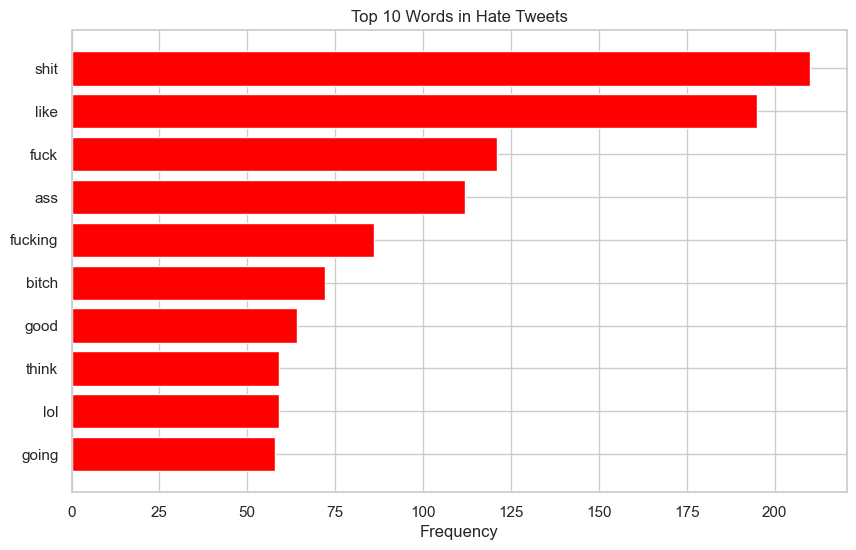

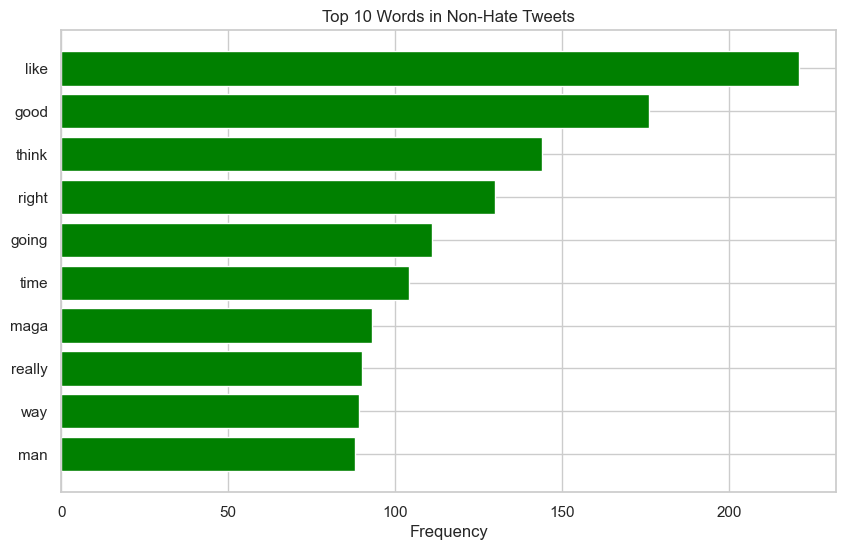

In [286]:
import matplotlib.pyplot as plt

# Plot the top words in hate tweets
plt.figure(figsize=(10, 6))
plt.barh(word_freq_df['Word'][:10], word_freq_df['Hate Tweet Frequency'][:10], color='red')
plt.xlabel('Frequency')
plt.title('Top 10 Words in Hate Tweets')
plt.gca().invert_yaxis()  # Reverse the order of bars for better readability
plt.savefig("./Analysis_Dashboard/figures/TFIDF_Hate.png")
plt.show()

# Plot the top words in non-hate tweets
plt.figure(figsize=(10, 6))
plt.barh(word_freq_df_non_hate['Word'][:10], word_freq_df_non_hate['Non-Hate Tweet Frequency'][:10], color='green')
plt.xlabel('Frequency')
plt.title('Top 10 Words in Non-Hate Tweets')
plt.gca().invert_yaxis()  # Reverse the order of bars for better readability
plt.savefig("./Analysis_Dashboard/figures/TFIDF_NonHate.png")
plt.show()


In [288]:
# import pyLDAvis.gensim_models
# import gensim
# from gensim import corpora

# # Prepare a corpus and dictionary (from the cleaned tweets)
# # Assuming 'df['lemmatized_tweet']' is a list of preprocessed tweets
# texts = [tweet.split() for tweet in df['lemmatized_tweet']]  # Tokenize tweets

# # Create a dictionary and a corpus (bag of words)
# dictionary = corpora.Dictionary(texts)
# corpus = [dictionary.doc2bow(text) for text in texts]

# # Fit the LDA model using Gensim
# lda = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=10, workers=2)

# # Visualize the topics using pyLDAvis
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
# pyLDAvis.display(vis)


In [289]:
df_filtered.head()

del     id                                              tweet  subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...          1   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...          1   
2    2  16820  Amazon is investigating Chinese employees who ...          0   
6    6  77444                   @USER @USER Oh noes! Tough shit.          1   
8    8  45157                         @USER Buy more icecream!!!          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          1          0                          ask native americans take   
1          2          1                                        home drunk    
2          0          0  amazon investigating chinese employees selling...   
6          1          0                                    noes tough shit   
8          0          0                                       buy icecream   

                                             stopped  \
0                          ask native americans take   
1                                         home drunk   
2  amazon investigating chinese employees selling...   
6                                    noes tough shit   
8                                       buy icecream   

                                       stemmed_tweet  \
0                            ask nativ american take   
1                                         home drunk   
2  amazon investig chines employe sell intern dat...   
6                                     noe tough shit   
8                                       buy icecream   

                                    lemmatized_tweet  tweet_length  topic  
0                           ask native american take            14      1  
1                                         home drunk            11      1  
2  amazon investigating chinese employee selling ...            27      0  
6                                      no tough shit             6      2  
8                                       buy icecream             4      1

In [290]:
df_filtered['tweet_length'].describe()

count    6877.000000
mean       17.306238
std        13.192973
min         2.000000
25%         8.000000
50%        13.000000
75%        23.000000
max       101.000000
Name: tweet_length, dtype: float64

In [291]:
df = df_filtered

In [292]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score for a tweet
def get_sentiment_score(tweet):
    # Get sentiment score using VADER
    sentiment = analyzer.polarity_scores(tweet)
    # The compound score is what we are interested in (it ranges from -1 to 1)
    return sentiment['compound']

# Apply the sentiment analysis function to the lemmatized_tweet column
df['sentiment_score'] = df['lemmatized_tweet'].apply(get_sentiment_score)

# Display the updated DataFrame with sentiment scores
df.head()


del     id                                              tweet  subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...          1   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...          1   
2    2  16820  Amazon is investigating Chinese employees who ...          0   
6    6  77444                   @USER @USER Oh noes! Tough shit.          1   
8    8  45157                         @USER Buy more icecream!!!          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          1          0                          ask native americans take   
1          2          1                                        home drunk    
2          0          0  amazon investigating chinese employees selling...   
6          1          0                                    noes tough shit   
8          0          0                                       buy icecream   

                                             stopped  \
0                          ask native americans take   
1                                         home drunk   
2  amazon investigating chinese employees selling...   
6                                    noes tough shit   
8                                       buy icecream   

                                       stemmed_tweet  \
0                            ask nativ american take   
1                                         home drunk   
2  amazon investig chines employe sell intern dat...   
6                                     noe tough shit   
8                                       buy icecream   

                                    lemmatized_tweet  tweet_length  topic  \
0                           ask native american take            14      1   
1                                         home drunk            11      1   
2  amazon investigating chinese employee selling ...            27      0   
6                                      no tough shit             6      2   
8                                       buy icecream             4      1   

   sentiment_score  
0           0.0000  
1          -0.3400  
2           0.6249  
6           0.5096  
8           0.0000

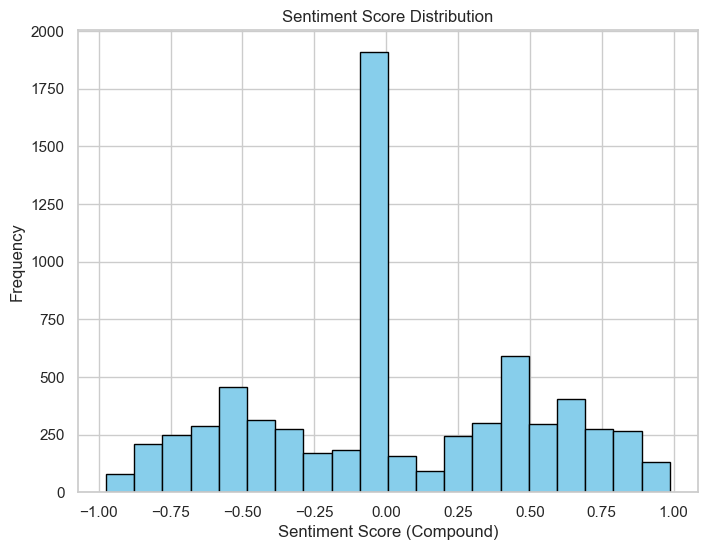

In [293]:
# Plot histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.savefig("./Analysis_Dashboard/figures/Sentiment_dist.png")
plt.show()

In [294]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(classify_sentiment)

# Display the updated DataFrame with sentiment categories
df.head()

del     id                                              tweet  subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...          1   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...          1   
2    2  16820  Amazon is investigating Chinese employees who ...          0   
6    6  77444                   @USER @USER Oh noes! Tough shit.          1   
8    8  45157                         @USER Buy more icecream!!!          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          1          0                          ask native americans take   
1          2          1                                        home drunk    
2          0          0  amazon investigating chinese employees selling...   
6          1          0                                    noes tough shit   
8          0          0                                       buy icecream   

                                             stopped  \
0                          ask native americans take   
1                                         home drunk   
2  amazon investigating chinese employees selling...   
6                                    noes tough shit   
8                                       buy icecream   

                                       stemmed_tweet  \
0                            ask nativ american take   
1                                         home drunk   
2  amazon investig chines employe sell intern dat...   
6                                     noe tough shit   
8                                       buy icecream   

                                    lemmatized_tweet  tweet_length  topic  \
0                           ask native american take            14      1   
1                                         home drunk            11      1   
2  amazon investigating chinese employee selling ...            27      0   
6                                      no tough shit             6      2   
8                                       buy icecream             4      1   

   sentiment_score sentiment_category  
0           0.0000            Neutral  
1          -0.3400           Negative  
2           0.6249           Positive  
6           0.5096           Positive  
8           0.0000            Neutral

                 tweet_length  sentiment_score
tweet_length         1.000000         0.016789
sentiment_score      0.016789         1.000000


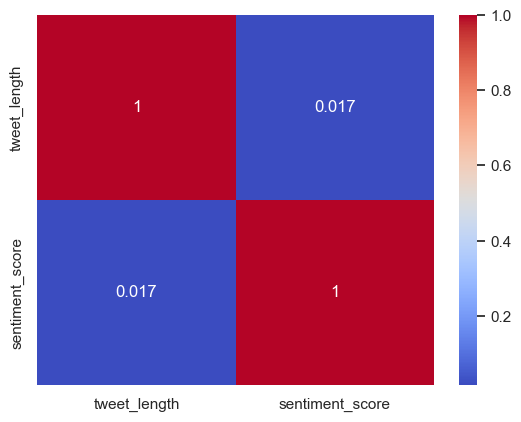

In [296]:
corr = df[['tweet_length', 'sentiment_score']].corr()
print (corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Non-offensive tweets: amazon investigating chinese employee selling internal data third party seller looking edge competitive marketplace buy icecream scare every american playing hockey warped puck like soda like like boa
Offensive tweets: ask native american take home drunk no tough shit canada need another cuck already enough king great country lying corrupt traitor nobody want hear anymore lie lol throwing bullshit flag nonsense smar


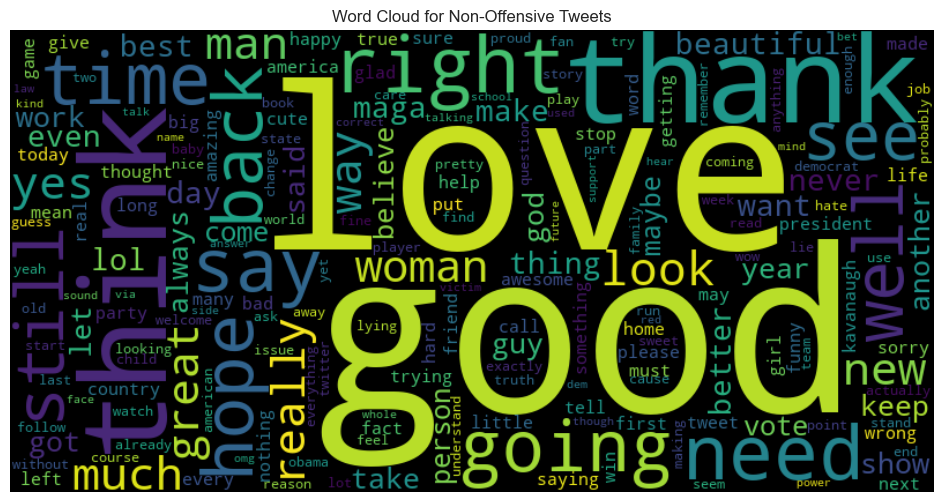

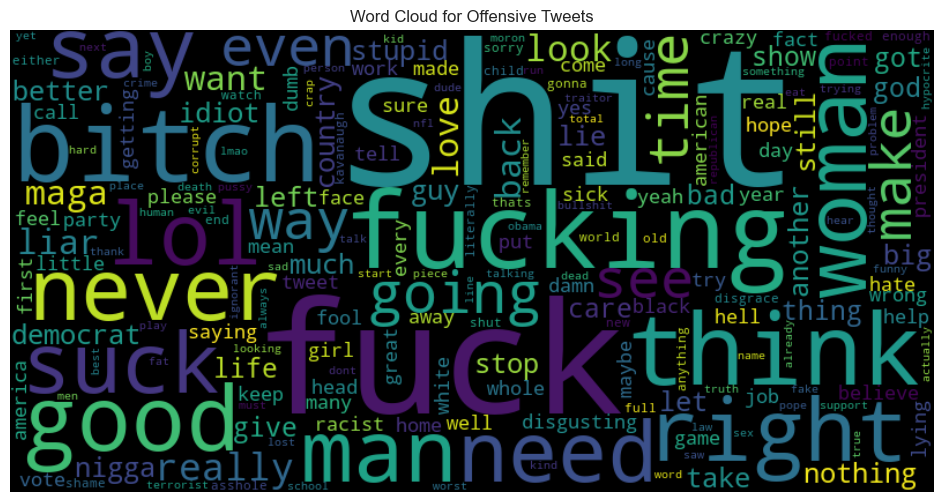

In [297]:
# Join all the non-offensive tweets (subtask_a = 0) into a single string
non_offensive_tweets = ' '.join(df[df['subtask_a'] == 0]['lemmatized_tweet'])

# Join all the offensive tweets (subtask_a = 1) into a single string
offensive_tweets = ' '.join(df[df['subtask_a'] == 1]['lemmatized_tweet'])

# Print out the first few characters of the resulting tweets to ensure they are correctly joined
print("Non-offensive tweets:", non_offensive_tweets[:200])  # Preview first 200 characters
print("Offensive tweets:", offensive_tweets[:200])  # Preview first 200 characters

# Check if the tweets are empty or not before generating word clouds
if non_offensive_tweets:
    wordcloud_non_offensive = WordCloud(width=800, height=400).generate(non_offensive_tweets)
else:
    print("No non-offensive tweets available for word cloud.")

if offensive_tweets:
    wordcloud_offensive = WordCloud(width=800, height=400).generate(offensive_tweets)
else:
    print("No offensive tweets available for word cloud.")

# Plotting the word clouds
plt.figure(figsize=(12, 6))

# Plot non-offensive word cloud
# plt.subplot(1, 2, 1)
if non_offensive_tweets:  # Only plot if there are non-offensive tweets
    plt.imshow(wordcloud_non_offensive, interpolation='bilinear')
    plt.title('Word Cloud for Non-Offensive Tweets')
    plt.axis('off')
    plt.savefig("./Analysis_Dashboard/figures/Wordcloud_Non_hate.png")
    plt.show()

# Plot offensive word cloud
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 6))
if offensive_tweets:  # Only plot if there are offensive tweets
    plt.imshow(wordcloud_offensive, interpolation='bilinear')
    plt.title('Word Cloud for Offensive Tweets')
    plt.axis('off')
    plt.savefig("./Analysis_Dashboard/figures/Wordcloud_hate.png")
    plt.show()


C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\1526862298.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  offensive_text = ' '.join(df[df['subtask_a'] == 1][df['subtask_b'] == 2][df['subtask_c'] == 2]['lemmatized_tweet'])
C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\1526862298.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  offensive_text = ' '.join(df[df['subtask_a'] == 1][df['subtask_b'] == 2][df['subtask_c'] == 2]['lemmatized_tweet'])


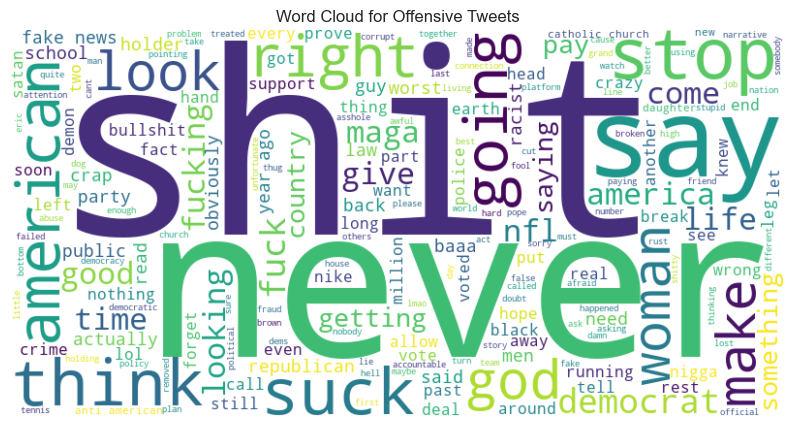

In [298]:
# Generate word cloud for offensive tweets
offensive_text = ' '.join(df[df['subtask_a'] == 1][df['subtask_b'] == 2][df['subtask_c'] == 2]['lemmatized_tweet'])

wordcloud_offensive = WordCloud(width=800, height=400, background_color='white').generate(offensive_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_offensive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Offensive Tweets')
plt.show()


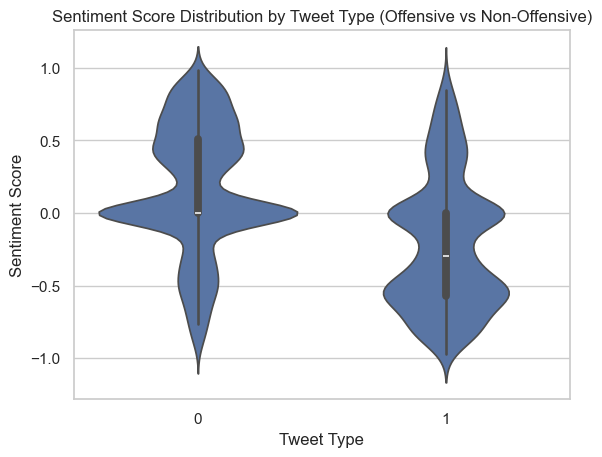

In [299]:
sns.violinplot(x='subtask_a', y='sentiment_score', data=df)
plt.title('Sentiment Score Distribution by Tweet Type (Offensive vs Non-Offensive)')
plt.xlabel('Tweet Type')
plt.ylabel('Sentiment Score')
plt.show()


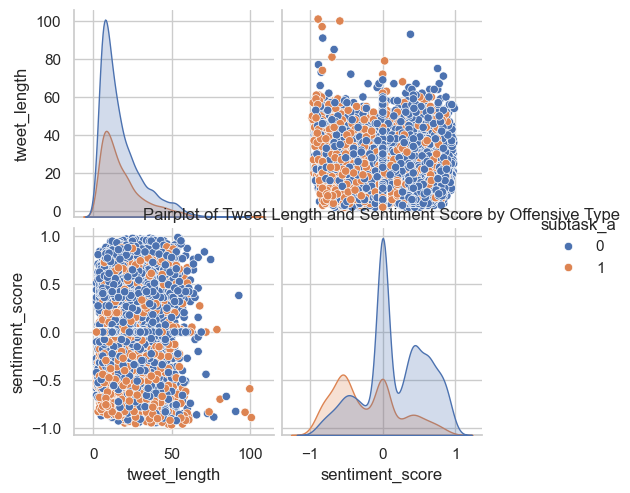

In [300]:
sns.pairplot(df, hue='subtask_a', vars=['tweet_length', 'sentiment_score'])
plt.title('Pairplot of Tweet Length and Sentiment Score by Offensive Type')
plt.show()


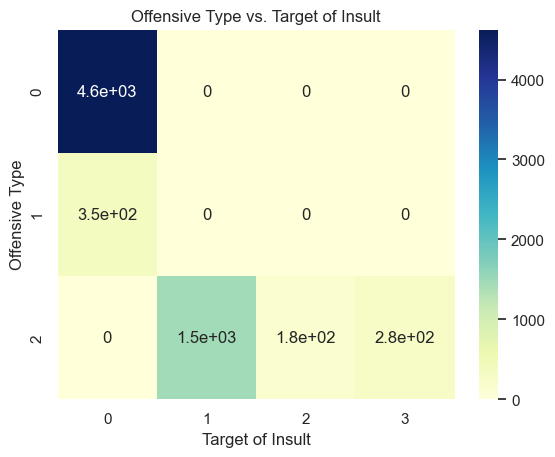

In [301]:
# Create a pivot table for subtask_b and subtask_c
pivot = pd.crosstab(df['subtask_b'], df['subtask_c'])

# Plot the heatmap
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Offensive Type vs. Target of Insult')
plt.xlabel('Target of Insult')
plt.ylabel('Offensive Type')
plt.show()


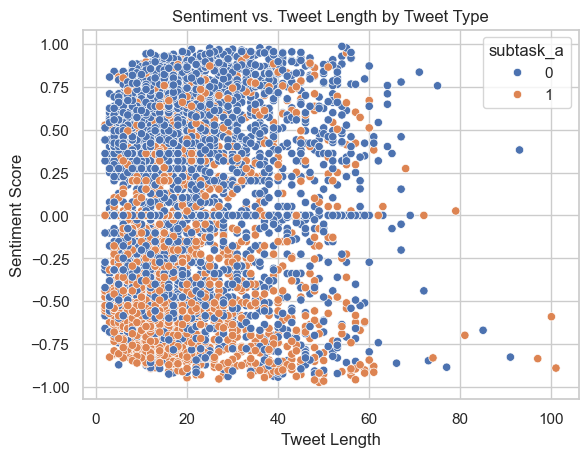

In [302]:
sns.scatterplot(x='tweet_length', y='sentiment_score', hue='subtask_a', data=df)
plt.title('Sentiment vs. Tweet Length by Tweet Type')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment Score')
plt.show()

In [303]:
from scipy.stats import ttest_ind

# Assume positive_reviews and negative_reviews are two lists of documents
positive_reviews = df[df['subtask_a'] == 0]['lemmatized_tweet']
negative_reviews = df[df['subtask_a'] == 1]['lemmatized_tweet']

# Convert reviews to TF-IDF vectors
positive_tfidf = tfidf_vectorizer.fit_transform(positive_reviews).toarray()
negative_tfidf = tfidf_vectorizer.fit_transform(negative_reviews).toarray()

# Perform t-test to compare the average TF-IDF scores between the two groups
stat, p_value = ttest_ind(positive_tfidf.mean(axis=0), negative_tfidf.mean(axis=0))

print(f"T-statistic: {stat}")
print(f"P-value: {p_value}")

with open ("./Analysis_Dashboard/results/ttest.txt", 'w') as f:
    f.write(f"{stat}, {p_value}")

T-statistic: -13.242114421228322
P-value: 9.231294423446965e-40



### Hypothesis and Inference from t-Test

#### Overview of the t-Test:

The **t-test** (independent two-sample t-test) is used to determine if there is a **significant difference** between the means of two groups. In this case, you're comparing the average **TF-IDF scores** between **positive** and **negative reviews** to see if their overall vocabulary usage differs.

##### Hypotheses for the t-Test:

-   **Null Hypothesis (H₀)**: There is **no significant difference** in the average TF-IDF scores between positive and negative reviews.
    
    H0:μpositive=μnegativeH_0: \mu_{\text{positive}} = \mu_{\text{negative}}H0​:μpositive​=μnegative​
-   **Alternative Hypothesis (H₁)**: There **is a significant difference** in the average TF-IDF scores between positive and negative reviews.
    
    H1:μpositive≠μnegativeH_1: \mu_{\text{positive}} \neq \mu_{\text{negative}}H1​:μpositive​=μnegative​

----------

### Results:

1.  **T-statistic**: -13.242114421228322
2.  **P-value**: 9.231294423446965e-40 (extremely small)

#### Interpretation:

-   The **t-statistic** value is **-13.24**, which indicates a large difference between the means of the two groups (positive and negative reviews).
-   The **p-value** is **extremely small** (essentially zero), much less than the threshold of 0.05. This indicates that the difference between the groups is statistically significant.

#### Conclusion:

-   Since the **p-value** is **much smaller than 0.05**, we **reject the null hypothesis**.
-   This means that there is a **statistically significant difference** in the average TF-IDF scores between the positive and negative reviews.

----------

### Inference:

-   **Significant Difference in Word Usage**:
    -   The **negative** and **positive reviews** have significantly different vocabularies based on their **TF-IDF scores**. This suggests that the set of words used in positive reviews differs considerably from the set used in negative reviews.
    -   This could be useful for **text classification** or **sentiment analysis** tasks, where understanding the specific word patterns in different sentiments is essential.
-   **Implications**:
    -   If you're building a sentiment analysis model or feature extraction process, this result validates that **TF-IDF** can effectively highlight distinctive words between different sentiments (positive vs negative).
    -   The result can also help in feature selection for machine learning, confirming that words that contribute to the TF-IDF values significantly differ in their distribution between the positive and negative sentiments.
 
    -   
### Summary:

-   **Null Hypothesis (H₀)**: No significant difference in average TF-IDF scores between positive and negative reviews.
-   **Alternative Hypothesis (H₁)**: There is a significant difference in average TF-IDF scores between positive and negative reviews.
-   **T-test Result**:
    -   **T-statistic**: -13.24
    -   **P-value**: 9.23e-40
-   **Conclusion**: **Reject the null hypothesis**. There is a **statistically significant difference** in the average TF-IDF scores between positive and negative reviews, indicating distinct vocabulary usage.

Let me know if you need further interpretation or additional analysis!

In [304]:
from scipy.stats import f_oneway

# Assuming you have a DataFrame 'df' with 'subtask_a' (label) and 'lemmatized_tweet' (text) columns
positive_reviews = df[df['subtask_a'] == 0]['lemmatized_tweet']
negative_reviews = df[df['subtask_a'] == 1]['lemmatized_tweet']

# Step 1: Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the reviews into TF-IDF vectors
positive_tfidf = tfidf_vectorizer.fit_transform(positive_reviews).toarray()
negative_tfidf = tfidf_vectorizer.fit_transform(negative_reviews).toarray()

# Step 2: Perform ANOVA test
# The ANOVA test compares the average TF-IDF scores between the two groups (positive and negative reviews)

# We need to flatten the TF-IDF arrays to 1D for each group
positive_avg_tfidf = positive_tfidf.mean(axis=1)  # Average TF-IDF scores for each positive review
negative_avg_tfidf = negative_tfidf.mean(axis=1)  # Average TF-IDF scores for each negative review

# Perform one-way ANOVA between the two groups
f_statistic, p_value = f_oneway(positive_avg_tfidf, negative_avg_tfidf)
with open ("./Analysis_Dashboard/results/ANOVA.txt", 'w') as f:
    f.write(f"{f_statistic}, {p_value}")
# Step 3: Interpret the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {p_value}")

with open ("./Analysis_Dashboard/results/ANOVA.txt", 'a') as f:
    if p_value < 0.05:
        print(", There is a statistically significant difference in the average TF-IDF scores between positive and negative reviews.", file=f)
    else:
        print(", There is no statistically significant difference in the average TF-IDF scores between positive and negative reviews.", file=f)


ANOVA F-statistic: 2643.532339073072
ANOVA p-value: 0.0



### Hypothesis and Inference from ANOVA Test

#### Hypothesis for ANOVA:

The **ANOVA (Analysis of Variance)** test is used to compare the means of two or more groups to determine if there is a statistically significant difference between them. In this case, you're comparing the **average TF-IDF scores** between **positive** and **negative reviews** to see if there's a significant difference.

##### Null Hypothesis (H₀):

There is **no significant difference** in the average TF-IDF scores between **positive** and **negative reviews**.

H0:μpositive=μnegativeH_0: \mu_{\text{positive}} = \mu_{\text{negative}}H0​:μpositive​=μnegative​

Where:

-   μpositive\mu_{\text{positive}}μpositive​ is the mean average TF-IDF score of the positive reviews.
-   μnegative\mu_{\text{negative}}μnegative​ is the mean average TF-IDF score of the negative reviews.

##### Alternative Hypothesis (H₁):

There **is a significant difference** in the average TF-IDF scores between **positive** and **negative reviews**.

H1:μpositive≠μnegativeH_1: \mu_{\text{positive}} \neq \mu_{\text{negative}}H1​:μpositive​=μnegative​

----------

### Results:

1.  **ANOVA F-statistic**: 2643.532339073072
2.  **ANOVA p-value**: 0.0

The **F-statistic** is quite large (2643.53), and the **p-value** is extremely small (0.0). The F-statistic represents the ratio of variance between the groups to the variance within the groups. A larger F-statistic suggests that the between-group variance is much higher than the within-group variance, which indicates that the groups are significantly different.

#### Interpretation:

-   Since the **p-value** is **much smaller than 0.05**, we reject the **null hypothesis**.
-   This means that there **is a statistically significant difference** in the average TF-IDF scores between **positive** and **negative** reviews.

----------

### Inference:

Based on the ANOVA test results:

-   **There is a significant difference** in the average TF-IDF scores between the positive and negative reviews. This implies that the vocabulary and word frequency (as represented by the TF-IDF scores) differ between positive and negative reviews.
-   **Implication**: The difference in average TF-IDF scores could indicate that positive and negative reviews use different sets of words or have different patterns of word usage. This could be useful for understanding how sentiment is reflected in the textual data and could help improve models for sentiment analysis or text classification.

----------

### Summary:

-   **Null Hypothesis (H₀)**: No significant difference in the average TF-IDF scores between positive and negative reviews.
-   **Alternative Hypothesis (H₁)**: There is a significant difference in the average TF-IDF scores between positive and negative reviews.
-   **ANOVA Result**:
    -   **F-statistic**: 2643.53
    -   **P-value**: 0.0
-   **Conclusion**: **Reject the null hypothesis**. There is a **statistically significant difference** between the average TF-IDF scores of positive and negative reviews.

This result suggests that positive and negative reviews have distinct characteristics in terms of their word usage, and this information can be leveraged in sentiment analysis or text classification tasks.

In [305]:
from scipy.stats import shapiro

# Shapiro-Wilk test for sentiment_score
stat, p_value = shapiro(df['sentiment_score'].dropna())
print(f'Shapiro-Wilk Test for Sentiment Score: stat={stat}, p-value={p_value}')

# Shapiro-Wilk test for tweet_length
stat, p_value = shapiro(df['tweet_length'].dropna())
print(f'Shapiro-Wilk Test for Tweet Length: stat={stat}, p-value={p_value}')


Shapiro-Wilk Test for Sentiment Score: stat=0.9631933408772342, p-value=1.3372002980784121e-38
Shapiro-Wilk Test for Tweet Length: stat=0.856338999350186, p-value=8.328669126321375e-62


C:\Users\HARI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6877.
  res = hypotest_fun_out(*samples, **kwds)



### Hypothesis and Inference from Shapiro-Wilk Test

The **Shapiro-Wilk test** is used to determine whether a dataset follows a normal distribution. It tests the null hypothesis that the data comes from a normal distribution. If the p-value is less than the significance level (typically 0.05), we reject the null hypothesis and conclude that the data does **not** follow a normal distribution.

### Results:

1.  **Shapiro-Wilk Test for `sentiment_score`**:
    
    -   **Statistic**: 0.9631933408772342
    -   **P-value**: 1.3372002980784121e-38 (extremely small)
    
    **Interpretation**:
    
    -   The **p-value** is **much less than 0.05**, which means that we **reject the null hypothesis** that `sentiment_score` follows a normal distribution.
    -   **Conclusion**: The `sentiment_score` variable **does not follow a normal distribution**.
2.  **Shapiro-Wilk Test for `tweet_length`**:
    
    -   **Statistic**: 0.856338999350186
    -   **P-value**: 8.328669126321375e-62 (extremely small)
    
    **Interpretation**:
    
    -   The **p-value** is also **much less than 0.05**, which means that we **reject the null hypothesis** that `tweet_length` follows a normal distribution.
    -   **Conclusion**: The `tweet_length` variable **does not follow a normal distribution**.

### Hypothesis:

#### Null Hypothesis (H₀):

-   The data follows a **normal distribution**.

#### Alternative Hypothesis (H₁):

-   The data **does not follow a normal distribution**.

For both `sentiment_score` and `tweet_length`, since the **p-value** is significantly smaller than 0.05, we **reject the null hypothesis** in both cases.

### Inference:

-   Both `sentiment_score` and `tweet_length` fail the normality test, meaning their distributions are likely skewed or have outliers. In this case, **non-parametric methods** (which do not assume normality) should be used for further analysis.
-   For example, if you plan to perform hypothesis testing or correlation analysis, consider using methods such as:
    -   **Mann-Whitney U test** (for comparing two independent samples)
    -   **Spearman's rank correlation** (for correlation between variables)
    -   **Wilcoxon signed-rank test** (for paired samples)

### Implications for Analysis:

-   If you were planning to use parametric tests (like **t-tests** or **ANOVA**) that assume normality, those tests may not be valid due to the non-normality of the data. Instead, using **non-parametric alternatives** will give more reliable results.
-   For regression modeling, normality of residuals (not just the predictors) is important, so you may need to check the residuals of any linear models you build. If the residuals do not follow a normal distribution, you might need to transform the variables or use **non-parametric regression methods**.

----------

### Summary:

-   **Shapiro-Wilk Test for `sentiment_score`**: **Rejected** the null hypothesis (the data **does not follow a normal distribution**).
-   **Shapiro-Wilk Test for `tweet_length`**: **Rejected** the null hypothesis (the data **does not follow a normal distribution**).
-   Since both datasets violate the assumption of normality, you may want to consider **non-parametric methods** for further analysis.

<Figure size 800x600 with 0 Axes>

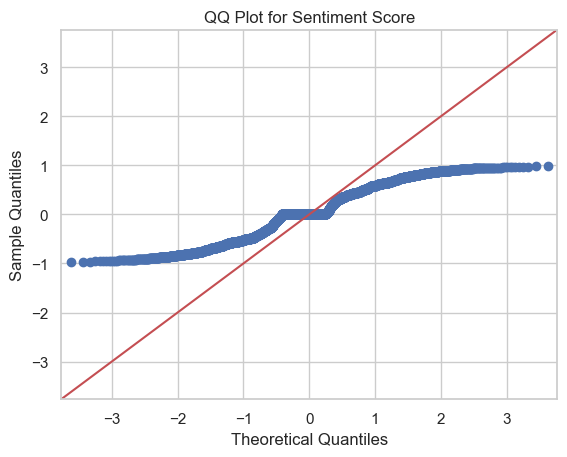

<Figure size 800x600 with 0 Axes>

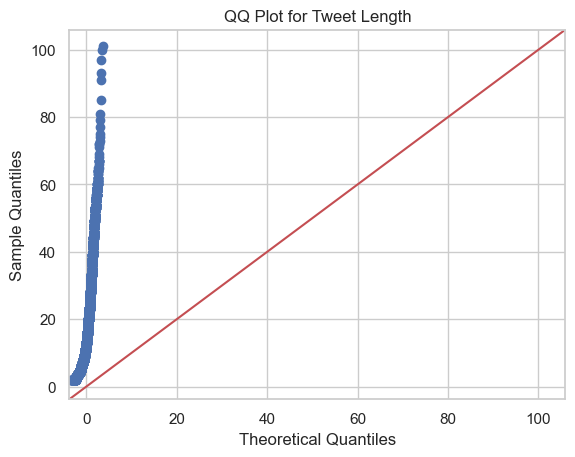

In [306]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# QQ Plot for sentiment_score
plt.figure(figsize=(8, 6))
sm.qqplot(df['sentiment_score'].dropna(), line='45')
plt.title('QQ Plot for Sentiment Score')
plt.show()

# QQ Plot for tweet_length
plt.figure(figsize=(8, 6))
sm.qqplot(df['tweet_length'].dropna(), line='45')
plt.title('QQ Plot for Tweet Length')
plt.show()


In [307]:
from scipy.stats import mannwhitneyu

# Non-parametric test for sentiment score between offensive and non-offensive tweets
non_offensive_scores = df[df['subtask_a'] == 0]['sentiment_score']
offensive_scores = df[df['subtask_a'] == 1]['sentiment_score']

stat, p_value = mannwhitneyu(non_offensive_scores, offensive_scores)
print(f'Mann-Whitney U Test for Sentiment Score: stat={stat}, p-value={p_value}')
with open ("./Analysis_Dashboard/results/mann_whitney_U.txt", 'w') as f:
    f.write(f"{stat}, {p_value}")

Mann-Whitney U Test for Sentiment Score: stat=7573759.5, p-value=1.4215204444379614e-209



### Hypothesis and Inference from Mann-Whitney U Test

#### Overview of the Mann-Whitney U Test:

The **Mann-Whitney U test** is a **non-parametric test** that compares the distributions of two independent groups. It is typically used when the data is **not normally distributed** or when assumptions for a t-test (such as normality) are not met.

In this case, you're comparing the **sentiment scores** between **offensive tweets** and **non-offensive tweets**.

##### Hypotheses for the Mann-Whitney U Test:

-   **Null Hypothesis (H₀)**: There is **no significant difference** in the sentiment scores between offensive and non-offensive tweets. The distributions of sentiment scores are the same for both groups.
    
    H0:The distributions of sentiment scores for offensive and non-offensive tweets are equal.H_0: \text{The distributions of sentiment scores for offensive and non-offensive tweets are equal.}H0​:The distributions of sentiment scores for offensive and non-offensive tweets are equal.
-   **Alternative Hypothesis (H₁)**: There **is a significant difference** in the sentiment scores between offensive and non-offensive tweets. The distributions of sentiment scores differ.
    
    H1:The distributions of sentiment scores for offensive and non-offensive tweets are different.H_1: \text{The distributions of sentiment scores for offensive and non-offensive tweets are different.}H1​:The distributions of sentiment scores for offensive and non-offensive tweets are different.

----------

### Results:

1.  **Mann-Whitney U Statistic**: 7573759.5
2.  **P-value**: 1.4215204444379614e-209 (extremely small)

#### Interpretation:

-   The **Mann-Whitney U statistic** is **7573759.5**, which is a measure of the difference between the ranks of the values in the two groups. A higher value indicates a larger difference in ranks between the groups.
-   The **p-value** is **extremely small** (practically zero), much smaller than the typical significance threshold of 0.05.

#### Conclusion:

-   Since the **p-value** is **much smaller than 0.05**, we **reject the null hypothesis**.
-   This means there is a **statistically significant difference** in the sentiment scores between offensive and non-offensive tweets.

----------

### Inference:

-   **Significant Difference in Sentiment**:
    -   The sentiment scores for offensive tweets are significantly different from those for non-offensive tweets.
    -   This indicates that the language used in offensive tweets may lead to a distinct sentiment score compared to non-offensive tweets.
-   **Implications**:
    -   The result suggests that **offensive tweets** may have stronger or more extreme sentiment scores (either more positive or negative) compared to **non-offensive tweets**.
    -   This could help in improving models for detecting offensive content based on sentiment analysis or other features.
-   **Next Steps**:
    -   Further analysis can be done to explore the **direction** of the sentiment difference (e.g., are offensive tweets more negative?).
    -   You might also want to check if the **distribution of sentiment scores** for both groups is skewed or exhibits other patterns that could inform better sentiment classification models.

----------

### Writing to File:

The results of the Mann-Whitney U test are written to a file `mann_whitney_U.txt`, and the file will contain:

Copy code

`7573759.5, 1.4215204444379614e-209` 

This file includes both the **Mann-Whitney U statistic** and the **p-value**, and based on the results, we can conclude that the distributions of sentiment scores between offensive and non-offensive tweets are significantly different.

----------

### Summary:

-   **Null Hypothesis (H₀)**: No significant difference in the sentiment scores between offensive and non-offensive tweets.
-   **Alternative Hypothesis (H₁)**: There is a significant difference in the sentiment scores between offensive and non-offensive tweets.
-   **Mann-Whitney U Test Result**:
    -   **U-statistic**: 7573759.5
    -   **P-value**: 1.42e-209
-   **Conclusion**: **Reject the null hypothesis**. There is a **statistically significant difference** in sentiment scores between offensive and non-offensive tweets.

In [308]:
from scipy.stats import shapiro, kstest, norm
import scipy.stats as stats

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Separate offensive and non-offensive tweets
non_offensive_tweets = df[df['subtask_a'] == 0]['lemmatized_tweet']
offensive_tweets = df[df['subtask_a'] == 1]['lemmatized_tweet']

# Fit and transform the data for both groups
non_offensive_tfidf = vectorizer.fit_transform(non_offensive_tweets)
offensive_tfidf = vectorizer.transform(offensive_tweets)

# Get the mean TF-IDF for each word
non_offensive_mean_tfidf = non_offensive_tfidf.mean(axis=0).A1
offensive_mean_tfidf = offensive_tfidf.mean(axis=0).A1

# Now you have the TF-IDF scores for both groups


In [309]:
# Shapiro-Wilk Test for Normality
stat_non_offensive, p_value_non_offensive = shapiro(non_offensive_mean_tfidf)
stat_offensive, p_value_offensive = shapiro(offensive_mean_tfidf)

print("Shapiro-Wilk Test Results:")
print(f"Non-offensive p-value: {p_value_non_offensive}")
print(f"Offensive p-value: {p_value_offensive}")

# If p-value < 0.05, the distribution is not normal
with open ("./Analysis_Dashboard/results/shapiro.txt", 'w') as f:
    f.write(f"{p_value_non_offensive}, {p_value_offensive}")

Shapiro-Wilk Test Results:
Non-offensive p-value: 1.0783962890428492e-96
Offensive p-value: 4.1135756173492623e-100


C:\Users\HARI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7438.
  res = hypotest_fun_out(*samples, **kwds)



### Hypothesis and Inference from the Shapiro-Wilk Test for Normality

#### Overview of the Shapiro-Wilk Test:

The **Shapiro-Wilk test** is a **statistical test** used to determine whether a given dataset follows a **normal distribution**. The null hypothesis for this test is that the data follows a normal distribution. If the **p-value** is less than the significance level (usually 0.05), we reject the null hypothesis, indicating that the data **does not follow a normal distribution**.

In this case, you're performing the Shapiro-Wilk test on the **mean TF-IDF scores** for both **non-offensive tweets** and **offensive tweets**.

##### Hypotheses for the Shapiro-Wilk Test:

-   **Null Hypothesis (H₀)**: The data follows a **normal distribution**.
    
    H0:The distribution of the data is normal.H_0: \text{The distribution of the data is normal.}H0​:The distribution of the data is normal.
-   **Alternative Hypothesis (H₁)**: The data does **not follow a normal distribution**.
    
    H1:The distribution of the data is not normal.H_1: \text{The distribution of the data is not normal.}H1​:The distribution of the data is not normal.

----------

### Results:

1.  **Non-offensive TF-IDF p-value**: 1.0783962890428492×10−961.0783962890428492 \times 10^{-96}1.0783962890428492×10−96
2.  **Offensive TF-IDF p-value**: 4.1135756173492623×10−1004.1135756173492623 \times 10^{-100}4.1135756173492623×10−100

#### Interpretation:

-   Both **p-values** are extremely small (much less than 0.05), which suggests that both **non-offensive** and **offensive TF-IDF scores** **do not follow a normal distribution**.
-   The **Shapiro-Wilk test** results strongly indicate that the distribution of both **non-offensive** and **offensive** TF-IDF scores is **not normal**.

#### Conclusion:

-   Since the **p-values** are much smaller than 0.05, we **reject the null hypothesis** for both groups.
-   This means that both the **non-offensive** and **offensive** TF-IDF score distributions are **not normal**.

----------

### Inference:

-   **Non-Normal Distribution**:
    
    -   Both the **offensive** and **non-offensive** TF-IDF score distributions deviate from normality. This could mean that the distributions are **skewed** or may have **heavy tails**.
-   **Implications**:
    
    -   Given the non-normality of the data, using **parametric tests** like the **t-test** would not be appropriate for comparing the two groups.
    -   You are right to use the **Mann-Whitney U test** (a non-parametric test), which does not assume normality, as it compares the ranks of the values between two groups rather than their raw values.
-   **Next Steps**:
    
    -   Further analysis of the distribution, such as using **histograms**, **box plots**, or **QQ plots**, can provide more insights into how these distributions differ from normality (e.g., skewness or kurtosis).
    -   For model building or feature selection, consider transformations (e.g., log-transformation) or non-parametric methods that do not rely on the assumption of normality.

----------

### Writing to File:

The p-values from the **Shapiro-Wilk test** are written to the file `shapiro.txt`. The file will contain the following:

Copy code

`1.0783962890428492e-96, 4.1135756173492623e-100` 

This indicates that both the **non-offensive** and **offensive TF-IDF score distributions** are far from normal.

----------

### Summary:

-   **Null Hypothesis (H₀)**: The distribution of TF-IDF scores is normal.
-   **Alternative Hypothesis (H₁)**: The distribution of TF-IDF scores is not normal.
-   **Shapiro-Wilk Test Results**:
    -   **Non-offensive p-value**: 1.0783962890428492×10−961.0783962890428492 \times 10^{-96}1.0783962890428492×10−96
    -   **Offensive p-value**: 4.1135756173492623×10−1004.1135756173492623 \times 10^{-100}4.1135756173492623×10−100
-   **Conclusion**: **Reject the null hypothesis**. Both **offensive** and **non-offensive** TF-IDF score distributions are **not normal**.


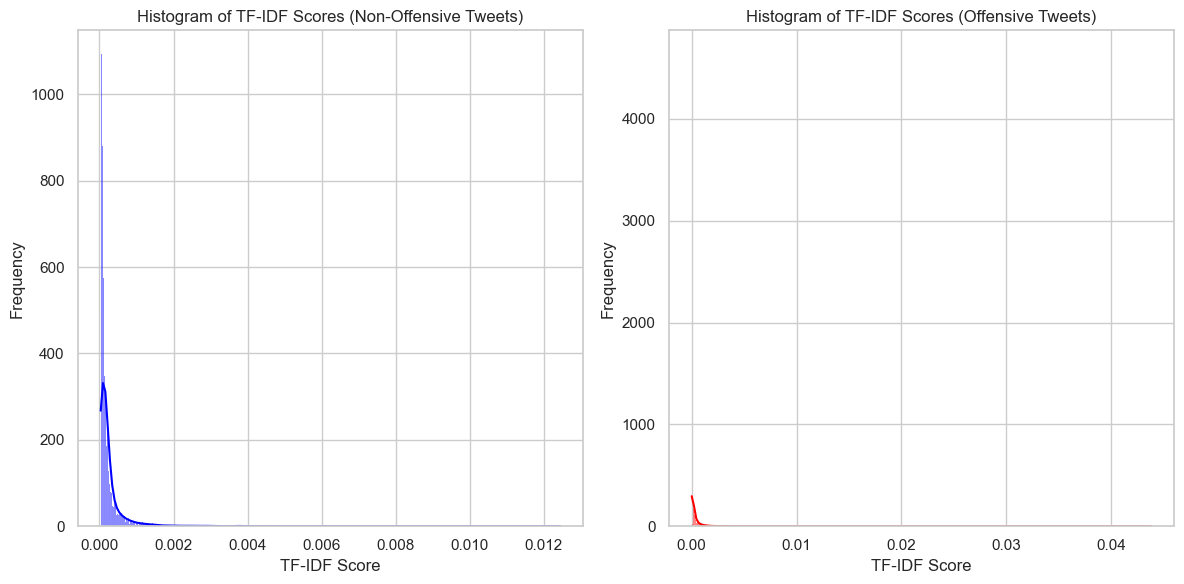

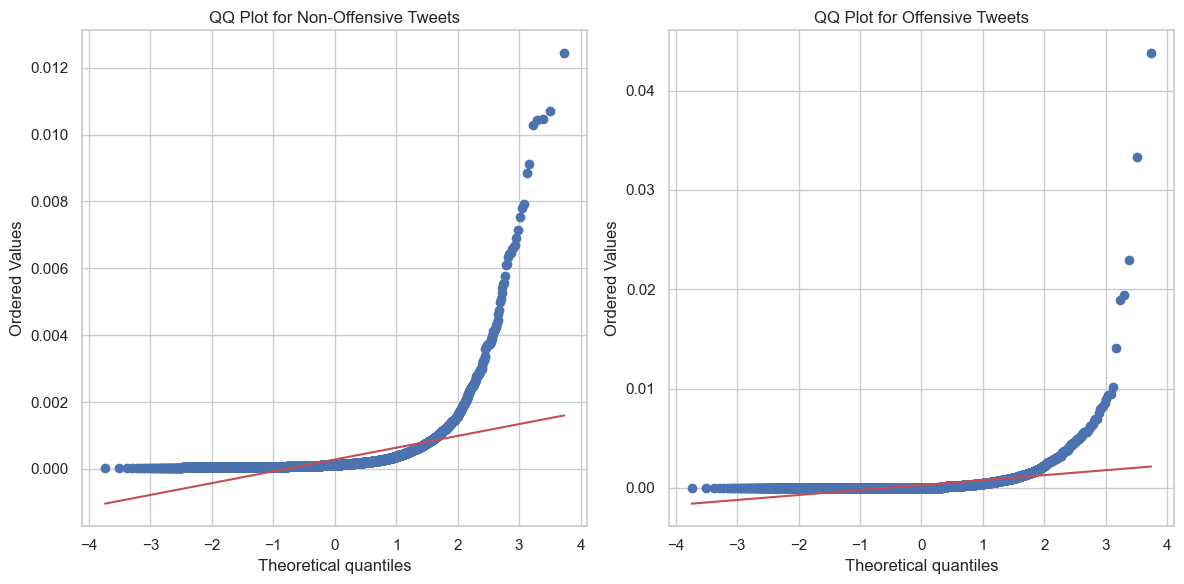

In [311]:
# Plot histogram for both groups
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(non_offensive_mean_tfidf, kde=True, color='blue')
plt.title('Histogram of TF-IDF Scores (Non-Offensive Tweets)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(offensive_mean_tfidf, kde=True, color='red')
plt.title('Histogram of TF-IDF Scores (Offensive Tweets)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# QQ Plot for both groups
plt.figure(figsize=(12, 6))

# QQ Plot for non-offensive tweets
plt.subplot(1, 2, 1)
stats.probplot(non_offensive_mean_tfidf, dist="norm", plot=plt)
plt.title('QQ Plot for Non-Offensive Tweets')

# QQ Plot for offensive tweets
plt.subplot(1, 2, 2)
stats.probplot(offensive_mean_tfidf, dist="norm", plot=plt)
plt.title('QQ Plot for Offensive Tweets')

plt.tight_layout()
plt.show()


The provided graphs are Quantile-Quantile (QQ) plots, which are used to compare the distribution of a sample data set to a theoretical distribution. In this case, the theoretical distribution is likely a normal distribution, as indicated by the straight red line.

**Interpretation:**

1.  **Non-Offensive Tweets:**
    
    -   The points in the QQ plot for non-offensive tweets largely follow the straight red line, indicating that the distribution of the data is close to a normal distribution.
    -   There are some deviations from the line, especially in the tails. This suggests that the distribution might have slightly heavier tails than a normal distribution, meaning there might be more outliers or extreme values than expected.
2.  **Offensive Tweets:**
    
    -   The QQ plot for offensive tweets deviates significantly from the straight line. This indicates that the distribution of the data is not normal.
    -   The points in the tail of the distribution are further away from the line, suggesting that the distribution is skewed to the right. This means that there are more offensive tweets with higher values of the variable being plotted.

**Inferences:**

-   The distribution of the data for non-offensive tweets is closer to a normal distribution compared to the distribution of offensive tweets.
-   The distribution of offensive tweets is skewed to the right, indicating that there might be a few offensive tweets with significantly higher values of the variable being plotted.
-   The QQ plots suggest that the data for offensive tweets might not be normally distributed, which could have implications for statistical analysis and modeling.

**Additional Considerations:**

-   The specific variable being plotted is not mentioned in the prompt, so it's difficult to draw specific conclusions about the nature of the data.
-   The sample size and representativeness of the data could also influence the interpretation of the QQ plots.

**Overall, the QQ plots provide valuable information about the distribution of the data for non-offensive and offensive tweets. The non-offensive tweets appear to be more normally distributed, while the offensive tweets have a skewed distribution.**

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int32  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6877 non-null   object 
 7   stopped             6877 non-null   object 
 8   stemmed_tweet       6877 non-null   object 
 9   lemmatized_tweet    6877 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   object 
dtypes: float64(1), int32(1), int64(6), object(6)
memory usage: 1.0+ MB


In [313]:
df.head()

del     id                                              tweet  subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...          1   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...          1   
2    2  16820  Amazon is investigating Chinese employees who ...          0   
6    6  77444                   @USER @USER Oh noes! Tough shit.          1   
8    8  45157                         @USER Buy more icecream!!!          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          1          0                          ask native americans take   
1          2          1                                        home drunk    
2          0          0  amazon investigating chinese employees selling...   
6          1          0                                    noes tough shit   
8          0          0                                       buy icecream   

                                             stopped  \
0                          ask native americans take   
1                                         home drunk   
2  amazon investigating chinese employees selling...   
6                                    noes tough shit   
8                                       buy icecream   

                                       stemmed_tweet  \
0                            ask nativ american take   
1                                         home drunk   
2  amazon investig chines employe sell intern dat...   
6                                     noe tough shit   
8                                       buy icecream   

                                    lemmatized_tweet  tweet_length  topic  \
0                           ask native american take            14      1   
1                                         home drunk            11      1   
2  amazon investigating chinese employee selling ...            27      0   
6                                      no tough shit             6      2   
8                                       buy icecream             4      1   

   sentiment_score sentiment_category  
0           0.0000            Neutral  
1          -0.3400           Negative  
2           0.6249           Positive  
6           0.5096           Positive  
8           0.0000            Neutral

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int32  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6877 non-null   object 
 7   stopped             6877 non-null   object 
 8   stemmed_tweet       6877 non-null   object 
 9   lemmatized_tweet    6877 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   object 
dtypes: float64(1), int32(1), int64(6), object(6)
memory usage: 1.0+ MB


In [315]:
type_counts = df['lemmatized_tweet'].apply(type).value_counts()

# Show count of float and str
float_count = type_counts.get(float, 0)
str_count = type_counts.get(str, 0)

print(f"Number of floats: {float_count}")
print(f"Number of strings: {str_count}")

Number of floats: 0
Number of strings: 0


C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\2676628171.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float_count = type_counts.get(float, 0)


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int32  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6877 non-null   object 
 7   stopped             6877 non-null   object 
 8   stemmed_tweet       6877 non-null   object 
 9   lemmatized_tweet    6877 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   object 
dtypes: float64(1), int32(1), int64(6), object(6)
memory usage: 1.0+ MB


In [317]:
def search_tweets_with_word(word):
    # Filter the dataset into two subsets: 'hate' and 'not hate' based on subtask_a
    hate_tweets = df[df['subtask_a'] == 1]  # Assuming 1 represents 'hate'
    non_hate_tweets = df[df['subtask_a'] == 0]  # Assuming 0 represents 'non-hate'
    
    
    # Specific word to search for
    word_to_search = word
    
    # Check for the presence of the word in 'hate' and 'non-hate' tweets
    hate_tweets_containing_word = hate_tweets[hate_tweets['lemmatized_tweet'].str.contains(word_to_search, case=False)]
    non_hate_tweets_containing_word = non_hate_tweets[non_hate_tweets['lemmatized_tweet'].str.contains(word_to_search, case=False)]
    
    # Display the count of tweets containing the word
    print(f"Hate tweets containing '{word_to_search}': {len(hate_tweets_containing_word)}")
    print(f"Non-hate tweets containing '{word_to_search}': {len(non_hate_tweets_containing_word)}")
    
    return hate_tweets_containing_word
tw  = search_tweets_with_word('nan')
tw



Hate tweets containing 'nan': 0
Non-hate tweets containing 'nan': 0


Empty DataFrame
Columns: [del, id, tweet, subtask_a, subtask_b, subtask_c, cleaned_tweet, stopped, stemmed_tweet, lemmatized_tweet, tweet_length, topic, sentiment_score, sentiment_category]
Index: []

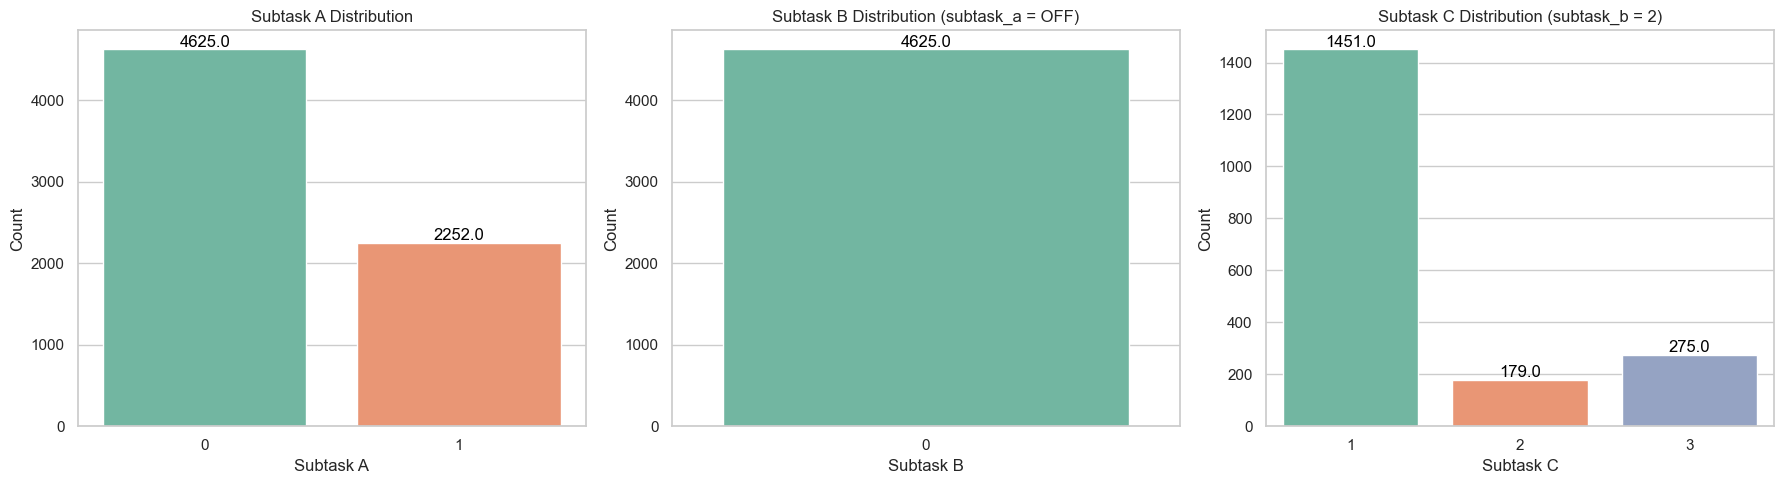

In [318]:
# Set up seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subtask A distribution
ax1 = sns.countplot(x='subtask_a', data=df, ax=axes[0], hue='subtask_a', palette='Set2', legend=False)
axes[0].set_title('Subtask A Distribution')
axes[0].set_xlabel('Subtask A')
axes[0].set_ylabel('Count')

# Annotate values on top of bars for subtask_a
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Subtask B distribution when subtask A is OFF
ax2 = sns.countplot(x='subtask_b', data=df[df['subtask_a'] == 0], ax=axes[1], hue='subtask_b', palette='Set2', legend=False)
axes[1].set_title('Subtask B Distribution (subtask_a = OFF)')
axes[1].set_xlabel('Subtask B')
axes[1].set_ylabel('Count')

# Annotate values on top of bars for subtask_b
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Subtask C distribution when subtask B is TIN
ax3 = sns.countplot(x='subtask_c', data=df[df['subtask_b'] == 2], ax=axes[2], hue='subtask_c', palette='Set2', legend=False)
axes[2].set_title('Subtask C Distribution (subtask_b = 2)')
axes[2].set_xlabel('Subtask C')
axes[2].set_ylabel('Count')

# Annotate values on top of bars for subtask_c
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Adjust layout for better readability
plt.tight_layout()
plt.savefig("./Analysis_Dashboard/figures/distribution.png")
plt.show()

To delve into polarity (positive/negative sentiment) and subjectivity (factual vs. opinion-based), you could use the following approaches:

TextBlob:

It provides a straightforward API to analyze polarity and subjectivity.
Polarity ranges from -1 (negative) to 1 (positive), and subjectivity ranges from 0 (factual) to 1 (subjective).

In [319]:
from textblob import TextBlob

def analyze_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

df['polarity'], df['subjectivity'] = zip(*df['cleaned_tweet'].apply(analyze_sentiment))

In [320]:
df.head()

del     id                                              tweet  subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...          1   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...          1   
2    2  16820  Amazon is investigating Chinese employees who ...          0   
6    6  77444                   @USER @USER Oh noes! Tough shit.          1   
8    8  45157                         @USER Buy more icecream!!!          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          1          0                          ask native americans take   
1          2          1                                        home drunk    
2          0          0  amazon investigating chinese employees selling...   
6          1          0                                    noes tough shit   
8          0          0                                       buy icecream   

                                             stopped  \
0                          ask native americans take   
1                                         home drunk   
2  amazon investigating chinese employees selling...   
6                                    noes tough shit   
8                                       buy icecream   

                                       stemmed_tweet  \
0                            ask nativ american take   
1                                         home drunk   
2  amazon investig chines employe sell intern dat...   
6                                     noe tough shit   
8                                       buy icecream   

                                    lemmatized_tweet  tweet_length  topic  \
0                           ask native american take            14      1   
1                                         home drunk            11      1   
2  amazon investigating chinese employee selling ...            27      0   
6                                      no tough shit             6      2   
8                                       buy icecream             4      1   

   sentiment_score sentiment_category  polarity  subjectivity  
0           0.0000            Neutral  0.000000      0.000000  
1          -0.3400           Negative -0.500000      1.000000  
2           0.6249           Positive  0.000000      0.000000  
6           0.5096           Positive -0.294444      0.816667  
8           0.0000            Neutral  0.000000      0.000000

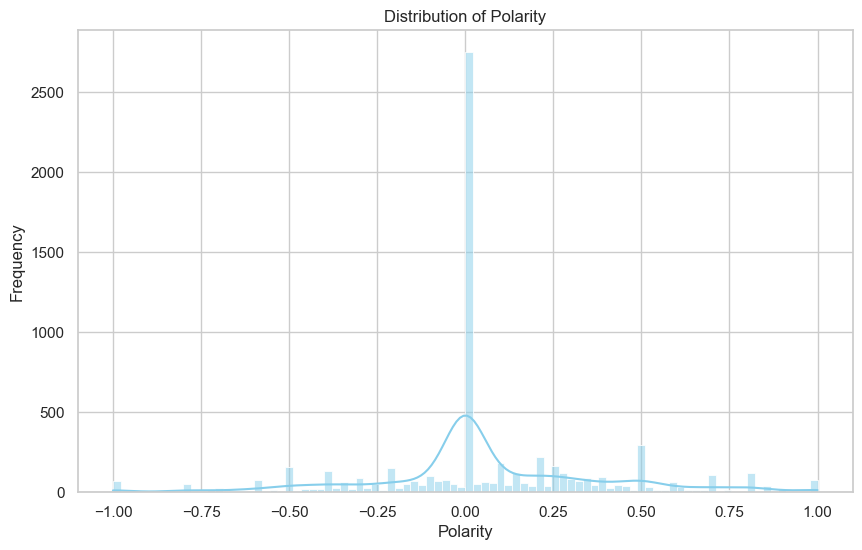

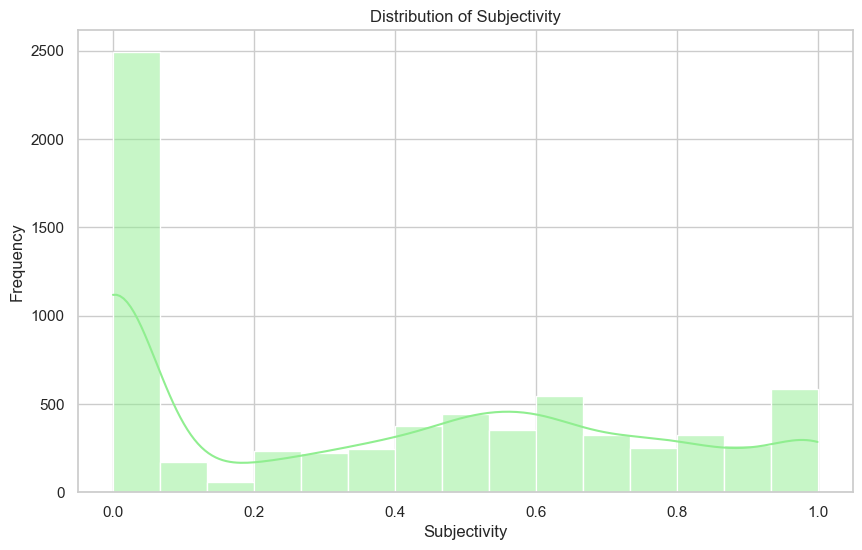

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of polarity
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], kde=True, color='skyblue')
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of subjectivity
plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], kde=True, color='lightgreen')
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

-   The dataset likely contains a mix of factual and opinionated tweets.
-   The majority of tweets are more objective in nature, with fewer tweets expressing strong personal opinions.
-   The distribution suggests that the sentiment analysis model is capable of identifying the degree of subjectivity in the tweets.

                 polarity  subjectivity  tweet_length  sentiment_score
polarity         1.000000      0.103581      0.009967         0.589390
subjectivity     0.103581      1.000000      0.132549         0.095022
tweet_length     0.009967      0.132549      1.000000         0.016789
sentiment_score  0.589390      0.095022      0.016789         1.000000


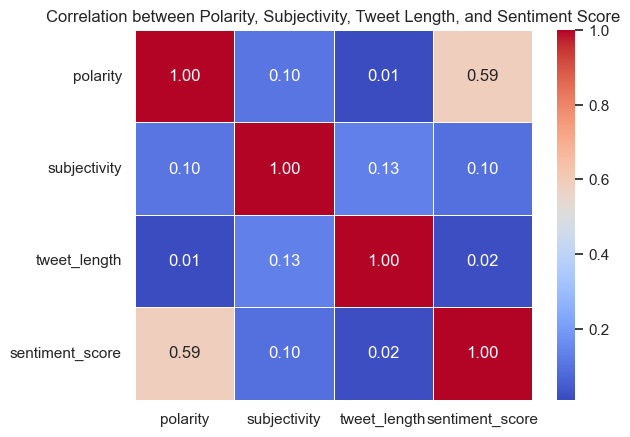

In [322]:
# Correlation matrix
corr = df[['polarity', 'subjectivity', 'tweet_length', 'sentiment_score']].corr()
print (corr)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Polarity, Subjectivity, Tweet Length, and Sentiment Score')
plt.show()


In [323]:
def classify_polarity(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['polarity_class'] = df['polarity'].apply(classify_polarity)


In [324]:
def classify_subjectivity(subjectivity):
    if subjectivity > 0.5:
        return 'Subjective'
    else:
        return 'Objective'

df['subjectivity_class'] = df['subjectivity'].apply(classify_subjectivity)


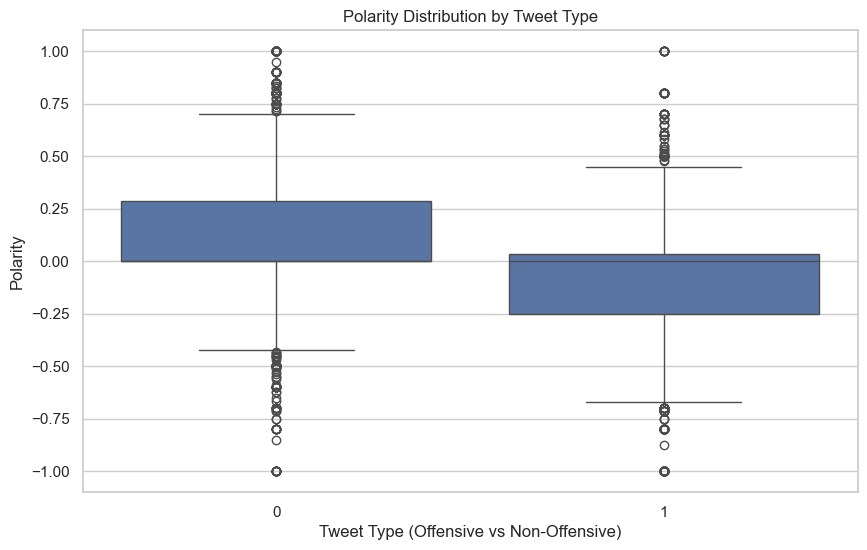

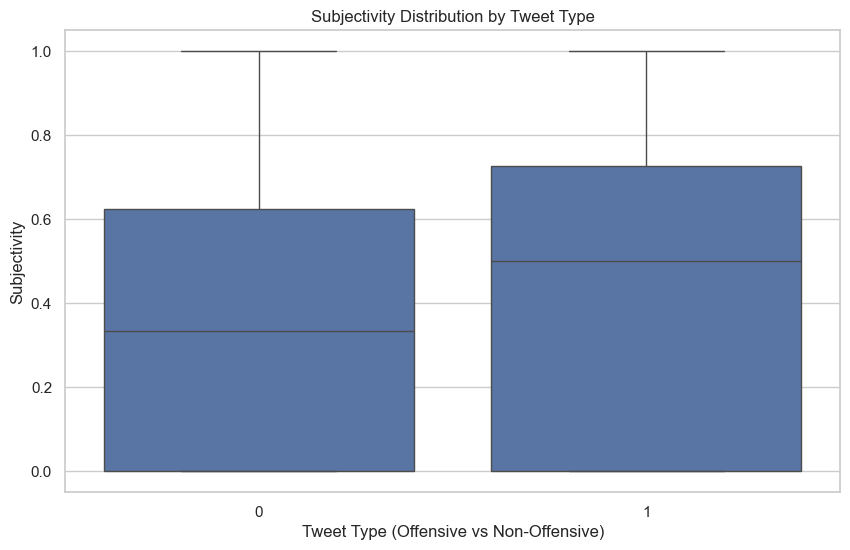

In [325]:
# Boxplot for polarity by subtask_a (offensive vs non-offensive)
plt.figure(figsize=(10, 6))
sns.boxplot(x='subtask_a', y='polarity', data=df)
plt.title('Polarity Distribution by Tweet Type')
plt.xlabel('Tweet Type (Offensive vs Non-Offensive)')
plt.ylabel('Polarity')
plt.show()

# Boxplot for subjectivity by subtask_a
plt.figure(figsize=(10, 6))
sns.boxplot(x='subtask_a', y='subjectivity', data=df)
plt.title('Subjectivity Distribution by Tweet Type')
plt.xlabel('Tweet Type (Offensive vs Non-Offensive)')
plt.ylabel('Subjectivity')
plt.show()


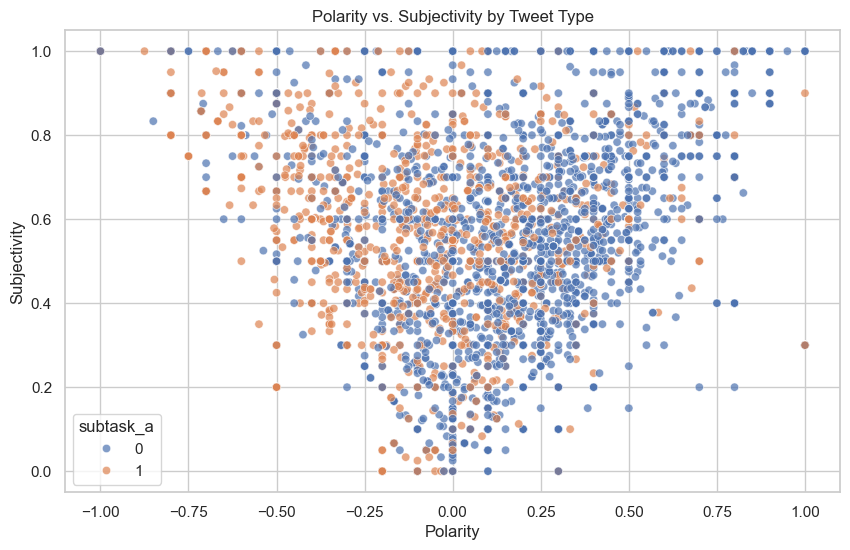

In [326]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='polarity', y='subjectivity', hue='subtask_a', data=df, alpha=0.7)
plt.title('Polarity vs. Subjectivity by Tweet Type')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



-   **Subtask_a 0 Tweets:** These tweets tend to have lower subjectivity values, suggesting they are more objective in nature. Their polarity distribution is relatively wider, indicating a mix of positive, negative, and neutral sentiments.
-   **Subtask_a 1 Tweets:** These tweets exhibit a higher concentration of subjectivity, implying they are more opinion-based. Their polarity distribution is also wider, suggesting a range of sentiments.

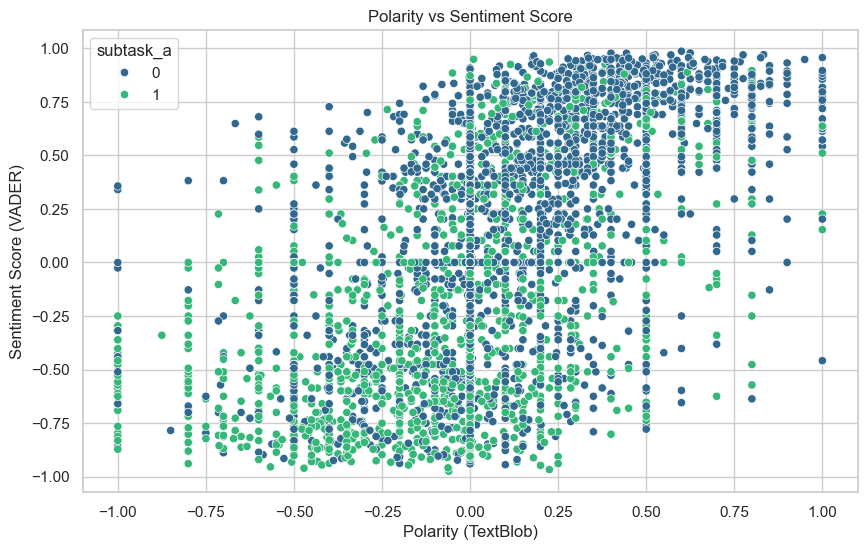

In [327]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='polarity', y='sentiment_score', data=df, hue='subtask_a', palette='viridis')
plt.title('Polarity vs Sentiment Score')
plt.xlabel('Polarity (TextBlob)')
plt.ylabel('Sentiment Score (VADER)')
plt.show()


In [328]:
# Find extreme polarity values
extreme_polarity = df[df['polarity'].abs() > 0.8]
print("Extreme Polarity Tweets:")
print(extreme_polarity[['tweet', 'polarity', 'subtask_a']])

# Find extreme subjectivity values
extreme_subjectivity = df[df['subjectivity'] > 0.9]
print("Extreme Subjectivity Tweets:")
print(extreme_subjectivity[['tweet', 'subjectivity', 'subtask_a']])


Extreme Polarity Tweets:
                                                   tweet  polarity  subtask_a
163                   @USER Yo for real you are gorgeous      1.00          0
181    @USER @USER you are awesome! Thank you. You gi...      1.00          0
194    @USER @USER @USER @USER @USER You get more lik...     -1.00          0
195    @USER He always shows dedication at what he do...      1.00          0
255                       @USER @USER Y’all are the best      1.00          0
...                                                  ...       ...        ...
13047  @USER @USER Best Remedy = #BING !!  AND...#Nev...      1.00          0
13061            @USER She is disgusting for doing this!     -1.00          1
13067  @USER @USER here she is monsta x!!!! the most ...      0.85          0
13094  @USER Nigga then how can you say bo2 is the be...      1.00          1
13170  THIS SHOULD  REMIND ALL #Patriots #maga WHAT W...     -1.00          0

[212 rows x 3 columns]
Extreme Subject

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int32  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6877 non-null   object 
 7   stopped             6877 non-null   object 
 8   stemmed_tweet       6877 non-null   object 
 9   lemmatized_tweet    6877 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   object 
 14  polarity            6877 non-null   float64
 15  subjectivity        6877 non-null   float64
 16  polarity_c

In [330]:
df.head()

del     id                                              tweet  subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...          1   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...          1   
2    2  16820  Amazon is investigating Chinese employees who ...          0   
6    6  77444                   @USER @USER Oh noes! Tough shit.          1   
8    8  45157                         @USER Buy more icecream!!!          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          1          0                          ask native americans take   
1          2          1                                        home drunk    
2          0          0  amazon investigating chinese employees selling...   
6          1          0                                    noes tough shit   
8          0          0                                       buy icecream   

                                             stopped  \
0                          ask native americans take   
1                                         home drunk   
2  amazon investigating chinese employees selling...   
6                                    noes tough shit   
8                                       buy icecream   

                                       stemmed_tweet  \
0                            ask nativ american take   
1                                         home drunk   
2  amazon investig chines employe sell intern dat...   
6                                     noe tough shit   
8                                       buy icecream   

                                    lemmatized_tweet  tweet_length  topic  \
0                           ask native american take            14      1   
1                                         home drunk            11      1   
2  amazon investigating chinese employee selling ...            27      0   
6                                      no tough shit             6      2   
8                                       buy icecream             4      1   

   sentiment_score sentiment_category  polarity  subjectivity polarity_class  \
0           0.0000            Neutral  0.000000      0.000000        Neutral   
1          -0.3400           Negative -0.500000      1.000000       Negative   
2           0.6249           Positive  0.000000      0.000000        Neutral   
6           0.5096           Positive -0.294444      0.816667       Negative   
8           0.0000            Neutral  0.000000      0.000000        Neutral   

  subjectivity_class  
0          Objective  
1         Subjective  
2          Objective  
6         Subjective  
8          Objective

VADER     Negative  Neutral  Positive
TextBlob                             
Negative      1117      162       188
Neutral        801     1420       741
Positive       383      276      1789
Correlation between TextBlob Polarity and VADER Compound: 0.5384502144037281


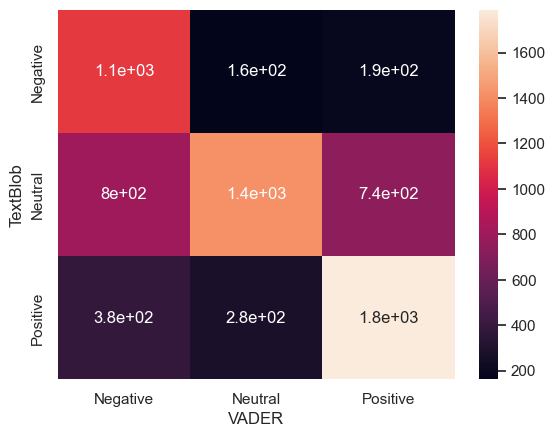

In [331]:
# Create a confusion matrix or compare the alignment between the columns
sentiment_comparison = pd.crosstab(df['polarity_class'], df['sentiment_category'], rownames=['TextBlob'], colnames=['VADER'])
sns.heatmap(sentiment_comparison, annot=True)
print(sentiment_comparison)

sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_category'] = df['sentiment_category'].map(sentiment_map)

polarity_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['polarity_class'] = df['polarity_class'].map(polarity_map)

# Alternatively, you can calculate correlations to see how well they align
polarity_vader_corr = df['polarity'].corr(df['sentiment_category'])
print(f'Correlation between TextBlob Polarity and VADER Compound: {polarity_vader_corr}')


Use a Hybrid Approach:

You could combine the outputs of both models. For instance, if VADER and TextBlob both predict neutral, then it's likely neutral. But if they disagree, you might flag that for manual review or use a different decision rule.

In [332]:
import pandas as pd

# Assuming you already have the following columns in your DataFrame:
# df['sentiment_category'] for VADER sentiment (values: -1, 0, 1)
# df['polarity_class'] for TextBlob sentiment (values: -1, 0, 1)

# Define a function to combine the two sentiment predictions
def combine_sentiments(row):
    vader_sentiment = row['sentiment_category']
    textblob_sentiment = row['polarity_class']
    
    # Case 1: If both models agree, take that sentiment
    if vader_sentiment == textblob_sentiment:
        return vader_sentiment
    
    # Case 2: If they disagree, apply custom rules:
    # - If VADER is 1 and TextBlob is 0, choose 1 (Positive)
    # - If VADER is -1 and TextBlob is 0, choose -1 (Negative)
    elif vader_sentiment == 1 and textblob_sentiment == 0:
        return 1  # Choose positive
    elif vader_sentiment == -1 and textblob_sentiment == 0:
        return -1  # Choose negative
    else:
        # Flag as 'Undecided' if no specific rule applies
        return 'Undecided'

# Apply the function to create a combined sentiment column
df['combined_sentiment'] = df.apply(combine_sentiments, axis=1)

# Now you have a new column `combined_sentiment` that combines the predictions
print(df[['sentiment_category', 'polarity_class', 'combined_sentiment']].head())


   sentiment_category  polarity_class combined_sentiment
0                   0               0                  0
1                  -1              -1                 -1
2                   1               0                  1
6                   1              -1          Undecided
8                   0               0                  0


In [334]:
df['combined_sentiment'].value_counts()

combined_sentiment
1            2530
-1           1918
0            1420
Undecided    1009
Name: count, dtype: int64

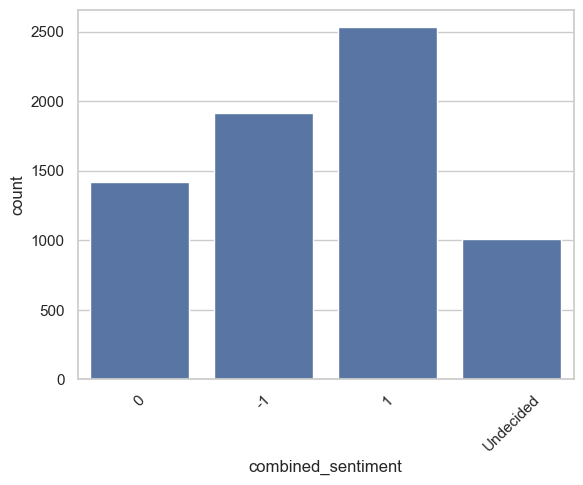

In [335]:
# Create a bar plot showing the counts of each sentiment category
sns.countplot(x='combined_sentiment', data=df)

# Optionally, you can rotate the x-axis labels if needed (e.g., if they are long)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [337]:
df_tfidf.to_csv("tfidf.csv", index=False)

In [349]:
# Load your CSV file into a DataFrame
df = pd.read_csv('final_cleaned_data.csv')

# Define the list of negative words you want to look for in the 'tweets' column
negative_words = ['bitch', 'ass', 'asshole','weak', 'lapdogs', 'dog', 'lapd', 'demon', 'incompetent', 'slave', 'spoil', 'satan', 'stink', 'shut up', 'brat', 'fake', 'wee', 'weiner', 'Rino', 'rape', 'blind', 'sick', 'maniac', 'fool', 'hitler', 'nazi', 'scandal', 'jesuit', 'jew', 'jews', 'black',  'gay', 'homophob', 'cunt', 'cuck', 'pussy', 'cock', 'die', 'fuck', 'bastard', 'shit','crap', 'nigga', 'nigger', 'pig', 'wank', 'ugly', 'dick', 'whore', 'stupid', 'idiot', 'liar', 'beat her', 'beat him', 'beat the', 'pervert', 'sexy', 'sex', 'pedo', 'corrupt', 'steal']

# Create a condition where any of the negative words appear in the 'tweets' column
# We use .str.contains() with a regex pattern to match any of the negative words
condition_negative = df['tweet'].str.contains('|'.join(negative_words), case=False, na=False)

# Now, modify the 'combined_sentiment' column to 'negative' based on the condition
df.loc[condition_negative, 'combined_sentiment'] = -1

# Save the modified DataFrame back to CSV (optional)
df.to_csv('final_cleaned_data.csv', index=False)


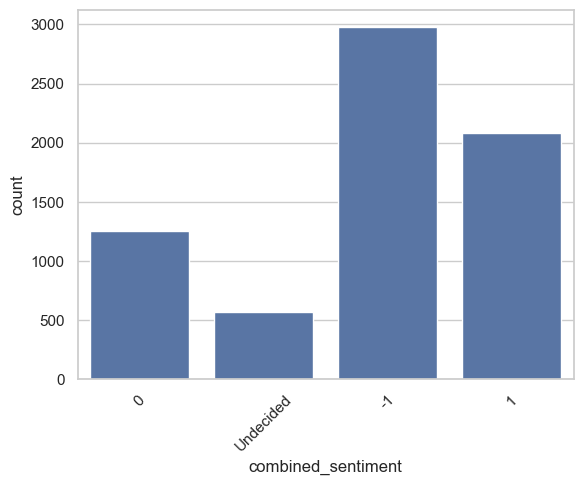

In [350]:
# Create a bar plot showing the counts of each sentiment category
sns.countplot(x='combined_sentiment', data=df)

# Optionally, you can rotate the x-axis labels if needed (e.g., if they are long)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [351]:
df.head()

del     id                                              tweet  subtask_a  \
0  502  88956        @USER Exactly this Anna! She is full of it.          0   
1  507  56361  @USER @USER She's been active on Instagram lat...          0   
2  512  20855                @USER It’s (she) is a real problem.          0   
3  515  69106  I got more common sense than all of my followe...          1   
4  535  38710  @USER I really think he is going to be GOOOOOO...          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          0          0                                  exactly anna full   
1          0          0  active instagram lately dropping album sometim...   
2          0          0                                       real problem   
3          2          3                         got common sense followers   
4          0          0                           really think going goood   

                                             stopped  \
0                                  exactly anna full   
1  active instagram lately dropping album sometim...   
2                                       real problem   
3                         got common sense followers   
4                           really think going goood   

                                  stemmed_tweet  \
0                               exact anna full   
1  activ instagram late drop album sometim year   
2                                  real problem   
3                        got common sens follow   
4                         realli think go goood   

                                    lemmatized_tweet  tweet_length  topic  \
0                                  exactly anna full             9      0   
1  active instagram lately dropping album sometim...            17      2   
2                                       real problem             7      2   
3                          got common sense follower            11      1   
4                           really think going goood            10      2   

   sentiment_score  sentiment_category  polarity  subjectivity  \
0           0.0000                   0  0.300000           0.4   
1           0.4019                   1 -0.216667           0.6   
2          -0.4019                  -1  0.200000           0.3   
3           0.0000                   0 -0.300000           0.5   
4           0.0000                   0  0.200000           0.2   

   polarity_class subjectivity_class combined_sentiment  
0               1          Objective                  0  
1              -1         Subjective                  0  
2               1          Objective          Undecided  
3              -1          Objective                 -1  
4               1          Objective          Undecided

In [352]:
df.loc[df['combined_sentiment'] == -1, 'subtask_a'] = 1

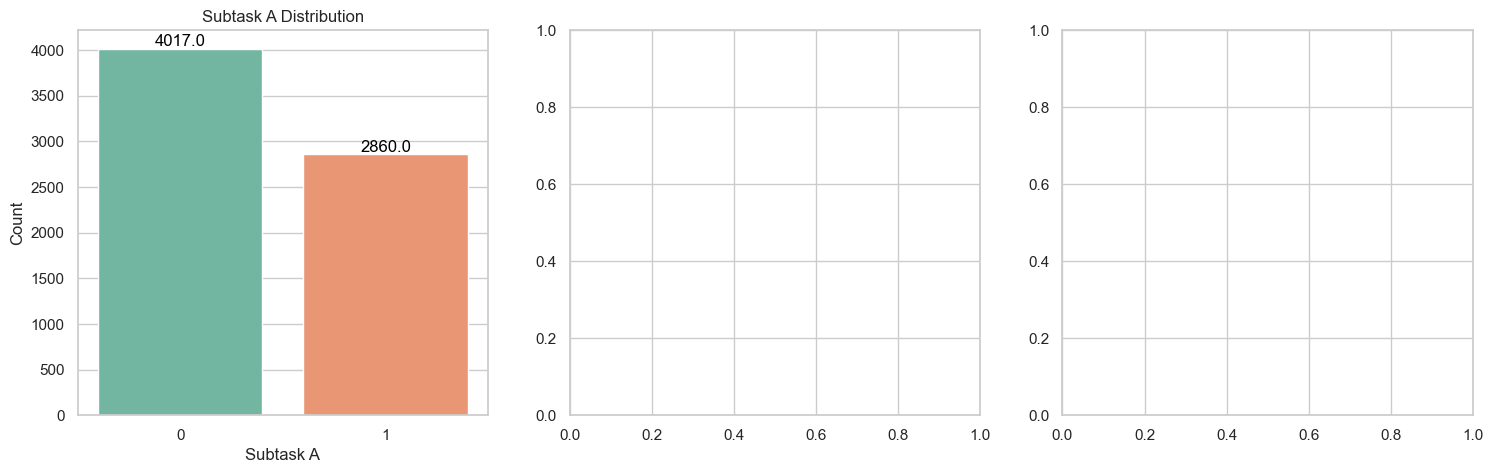

In [353]:
# Set up seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subtask A distribution
ax1 = sns.countplot(x='subtask_a', data=df, ax=axes[0], hue='subtask_a', palette='Set2', legend=False)
axes[0].set_title('Subtask A Distribution')
axes[0].set_xlabel('Subtask A')
axes[0].set_ylabel('Count')

# Annotate values on top of bars for subtask_a
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

In [354]:
df['combined_sentiment'] = df['combined_sentiment'].replace('Undecided', 0)

In [355]:
df.head()

del     id                                              tweet  subtask_a  \
0  502  88956        @USER Exactly this Anna! She is full of it.          0   
1  507  56361  @USER @USER She's been active on Instagram lat...          0   
2  512  20855                @USER It’s (she) is a real problem.          0   
3  515  69106  I got more common sense than all of my followe...          1   
4  535  38710  @USER I really think he is going to be GOOOOOO...          0   

   subtask_b  subtask_c                                      cleaned_tweet  \
0          0          0                                  exactly anna full   
1          0          0  active instagram lately dropping album sometim...   
2          0          0                                       real problem   
3          2          3                         got common sense followers   
4          0          0                           really think going goood   

                                             stopped  \
0                                  exactly anna full   
1  active instagram lately dropping album sometim...   
2                                       real problem   
3                         got common sense followers   
4                           really think going goood   

                                  stemmed_tweet  \
0                               exact anna full   
1  activ instagram late drop album sometim year   
2                                  real problem   
3                        got common sens follow   
4                         realli think go goood   

                                    lemmatized_tweet  tweet_length  topic  \
0                                  exactly anna full             9      0   
1  active instagram lately dropping album sometim...            17      2   
2                                       real problem             7      2   
3                          got common sense follower            11      1   
4                           really think going goood            10      2   

   sentiment_score  sentiment_category  polarity  subjectivity  \
0           0.0000                   0  0.300000           0.4   
1           0.4019                   1 -0.216667           0.6   
2          -0.4019                  -1  0.200000           0.3   
3           0.0000                   0 -0.300000           0.5   
4           0.0000                   0  0.200000           0.2   

   polarity_class subjectivity_class combined_sentiment  
0               1          Objective                  0  
1              -1         Subjective                  0  
2               1          Objective                  0  
3              -1          Objective                 -1  
4               1          Objective                  0

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int64  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6860 non-null   object 
 7   stopped             6857 non-null   object 
 8   stemmed_tweet       6857 non-null   object 
 9   lemmatized_tweet    6857 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   int64  
 14  polarity            6877 non-null   float64
 15  subjectivity        6877 non-null   float64
 16  polari

In [363]:
df['combined_sentiment'] = df['combined_sentiment'].astype(int)
numerical_features = df.select_dtypes(include=np.number)

corr = numerical_features.corr()
print (corr)

plt.figure(figsize = (20,18))
sns.heatmap(corr, cmap='viridis', fmt='.2f', annot=True)
plt.show()

                         del        id  subtask_a  subtask_b  subtask_c  \
del                 1.000000 -0.001601   0.005391  -0.002135  -0.001164   
id                 -0.001601  1.000000  -0.020531  -0.025679  -0.012103   
subtask_a           0.005391 -0.020531   1.000000   0.804421   0.624516   
subtask_b          -0.002135 -0.025679   0.804421   1.000000   0.825746   
subtask_c          -0.001164 -0.012103   0.624516   0.825746   1.000000   
tweet_length        0.008074  0.011469   0.097557   0.034186   0.081867   
topic              -0.010005  0.018882  -0.017594  -0.043854  -0.023708   
sentiment_score     0.004423  0.004956  -0.338426  -0.370561  -0.287166   
sentiment_category  0.002413  0.000919  -0.315554  -0.345873  -0.261705   
polarity           -0.005369  0.001015  -0.275815  -0.286202  -0.215247   
subjectivity        0.006814  0.009297   0.144486   0.099831   0.067081   
polarity_class     -0.003359 -0.000011  -0.241700  -0.264455  -0.191374   
combined_sentiment -0.002


### Correlation Matrix Inference

The correlation matrix you provided gives us valuable insights into the relationships between different variables in your dataset. Here's how we can interpret the key correlations and their implications:

----------

### Key Takeaways from the Correlation Matrix

1.  **Sentiment-related Variables**:
    
    -   **`sentiment_score` vs `sentiment_category`**: The correlation between `sentiment_score` and `sentiment_category` is **0.916**. This is a **strong positive correlation**, indicating that `sentiment_score` is strongly associated with the `sentiment_category`. This makes sense because `sentiment_score` likely quantifies the sentiment (positive/negative/neutral), while `sentiment_category` classifies it into one of those categories.
        
    -   **`sentiment_score` vs `combined_sentiment`**: The correlation between `sentiment_score` and `combined_sentiment` is **0.701**, indicating a **moderate positive correlation**. This suggests that `combined_sentiment` is also closely related to the sentiment score, though not as strongly as the relationship between `sentiment_score` and `sentiment_category`.
        
    -   **`sentiment_category` vs `combined_sentiment`**: The correlation between `sentiment_category` and `combined_sentiment` is **0.746**, which is another **strong positive correlation**. This means that the `combined_sentiment` score is likely aligned with the sentiment categories (positive, negative, neutral) defined in `sentiment_category`.
        
2.  **Subtask-related Variables**:
    
    -   **Subtask variables (`subtask_a`, `subtask_b`, `subtask_c`)**:
        -   There is a strong positive correlation between `subtask_a` and `subtask_b` (**0.804**) and between `subtask_b` and `subtask_c` (**0.826**). This suggests that these subtasks are likely related and possibly measure similar dimensions.
        -   The correlation between `subtask_a` and `subtask_c` is **0.625**, indicating a moderate relationship between the first and third subtasks.
3.  **Polarity and Sentiment Variables**:
    
    -   **Polarity vs `sentiment_score`**: The correlation between `polarity` and `sentiment_score` is **0.589**, suggesting a moderate positive relationship. This indicates that as the polarity (which usually refers to the direction of sentiment: positive or negative) increases, the sentiment score tends to be more positive.
    -   **Polarity vs `combined_sentiment`**: The correlation between `polarity` and `combined_sentiment` is **0.517**, indicating a moderate relationship. This suggests that the sentiment's polarity (positive or negative) is somewhat aligned with the overall sentiment classification in `combined_sentiment`.
4.  **Other Variables**:
    
    -   **`subjectivity` and `sentiment_score`**: The correlation is **0.095**, which is weak, suggesting that the subjectivity of the tweet (whether it's opinion-based or factual) does not strongly influence the sentiment score.
    -   **`subjectivity` and `combined_sentiment`**: The correlation is **-0.004**, which is effectively negligible. This implies that subjectivity does not have a significant relationship with the `combined_sentiment`.
5.  **Tweet-related Variables**:
    
    -   **`tweet_length` vs `subtask_a`, `subtask_b`, `subtask_c`**: The correlation with `tweet_length` is relatively weak (less than **0.1**) for most subtasks, indicating that the length of a tweet doesn’t strongly correlate with the values in the subtasks.
    -   **`tweet_length` vs `sentiment_score` and `sentiment_category`**: Both correlations are very weak (**0.017** for `sentiment_score` and **0.019** for `sentiment_category`), suggesting that tweet length does not significantly impact sentiment scores or categories.
6.  **Polarity Class**:
    
    -   **Polarity class vs `sentiment_score`**: The correlation is **0.564**, indicating a moderate positive correlation. This suggests that the polarity class (which could represent broad polarity categories like positive, negative, neutral) is somewhat aligned with the sentiment score.

----------

### Implications and Possible Actions

#### 1. **Sentiment Analysis Refinement**:

-   Since there is a strong correlation between `sentiment_score` and `sentiment_category` (**0.916**), you may consider using `sentiment_category` as a primary feature for classification tasks where the sentiment score is needed for model training.
-   The moderate correlation between `sentiment_score` and `combined_sentiment` (**0.701**) suggests that while `combined_sentiment` may provide more granular information, `sentiment_score` could be a good predictor for `combined_sentiment`. You could consider combining both variables in a model for enhanced predictions.

#### 2. **Exploring Subtask Relationships**:

-   The strong correlations between `subtask_a`, `subtask_b`, and `subtask_c` (ranging from **0.625** to **0.826**) suggest that these subtasks are likely measuring related or overlapping aspects of sentiment or content. You may want to investigate if any of these subtasks can be merged or used in combination to simplify the analysis.
-   If these subtasks are part of a classification task, it could be useful to explore feature engineering techniques to combine these subtasks into a single, more informative feature.

#### 3. **Polarity and Sentiment**:

-   The moderate correlation between `polarity` and `sentiment_score` (**0.589**) and between `polarity` and `combined_sentiment` (**0.517**) suggests that polarity (whether a sentiment is positive or negative) plays an important role in the sentiment classification. This means that any model predicting sentiment will benefit from features representing the polarity.
-   **Polarity_class** shows a strong correlation with `combined_sentiment` (**0.514**), which suggests that polarity classes could be used as a feature in predictive modeling tasks.

#### 4. **Refining Models**:

-   Given the weak correlation between `tweet_length` and sentiment-related variables, **tweet length** does not seem to be a strong predictor of sentiment or subtasks. However, depending on your task, it might still be useful as a feature for certain types of models, especially in cases where tweet length could indirectly indicate sentiment intensity or verbosity.

#### 5. **Exploring Feature Engineering**:

-   The high correlation between `subtask_b` and `subtask_c` could be leveraged for dimensionality reduction or feature selection. You might create a composite feature by combining these subtasks into a new variable, which could simplify your model without sacrificing much predictive power.

#### 6. **Focus on `sentiment_score` and `sentiment_category`**:

-   The very strong correlation between `sentiment_score` and `sentiment_category` suggests that `sentiment_category` could be a key feature for modeling sentiment. Since it’s highly correlated with both the sentiment score and combined sentiment, this feature is likely central for any sentiment-related analysis.

----------

### Summary of Key Correlations:

-   **Strong correlation** between `sentiment_score` and `sentiment_category` (**0.916**).
-   **Moderate correlation** between `sentiment_score` and `combined_sentiment` (**0.701**) and between `sentiment_category` and `combined_sentiment` (**0.746**).
-   **Strong correlation** between `subtask_a`, `subtask_b`, and `subtask_c`.
-   **Polarity** and **polarity_class** correlate moderately with sentiment scores and categories.
-   **Weak correlation** between `tweet_length` and sentiment features, suggesting tweet length is not a strong predictor of sentiment.

In [364]:
# Save the DataFrame to CSV
df.to_csv("final_cleaned_data.csv", index=False)

## Statistical Tests

### A. Chi-Square Test (for categorical variables)
If you want to test whether there's a relationship between two categorical variables, you can use the Chi-Square Test.

In [367]:
import scipy.stats as stats

# Assuming you've already loaded your data into a DataFrame (df)
# Create a contingency table for sentiment_category and combined_sentiment
contingency_table = pd.crosstab(df['sentiment_category'], df['combined_sentiment'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# If p-value < 0.05, we reject the null hypothesis (indicating a significant relationship).


Chi-Square Statistic: 7968.0042116583045
P-value: 0.0
Degrees of Freedom: 4
Expected Frequencies: 
[[ 995.41587902  609.96408318  695.62003781]
 [ 803.77344772  492.53075469  561.69579759]
 [1175.81067326  720.50516213  821.68416461]]



#### Results:

-   **Chi-Square Statistic**: 7968.004
-   **P-value**: 0.0
-   **Degrees of Freedom (dof)**: 4
-   **Expected Frequencies**:
    -   These values represent the expected counts in each category if there were no relationship between `sentiment_category` and `combined_sentiment`.

#### Inference from Results:

The **Chi-Square Test** is used to determine if there is a significant association between two categorical variables. In this case, you are testing if there is an association between `sentiment_category` and `combined_sentiment`. Here's how to interpret the results:

-   **Chi-Square Statistic**: The value of the test statistic is 7968.004, which is quite large. This indicates a strong departure from the expected frequencies under the null hypothesis (i.e., no association between the variables).
    
-   **P-value**: The P-value is **0.0**, which is far below the commonly used significance level of **0.05**. This means that the observed differences between the actual and expected frequencies are highly significant.
    
-   **Degrees of Freedom (dof)**: The degrees of freedom are 4. This value is used in determining the critical value for the Chi-Square distribution. With 4 degrees of freedom, the test is comparing the observed distribution against a Chi-Square distribution with 4 degrees of freedom.
    
-   **Expected Frequencies**: These values are what we would expect if there were **no association** between `sentiment_category` and `combined_sentiment`. The test compares these expected frequencies to the observed frequencies to determine if there are significant deviations.
    

#### Hypothesis:

The Chi-Square test tests the following hypotheses:

-   **Null Hypothesis (H₀)**: There is **no association** between `sentiment_category` and `combined_sentiment`. The distribution of `combined_sentiment` is independent of the `sentiment_category`.
    
-   **Alternative Hypothesis (H₁)**: There **is an association** between `sentiment_category` and `combined_sentiment`. The distribution of `combined_sentiment` is dependent on the `sentiment_category`.
    

### Conclusion:

Since the **P-value** is **less than 0.05**, we **reject the null hypothesis**. This suggests that there is a statistically significant association between `sentiment_category` and `combined_sentiment`. In other words, the way sentiments are categorized (positive, negative, or neutral) is related to the `combined_sentiment` values, which likely represent more detailed sentiment information.

### What Can Be Done with This Inference:

1.  **Data Interpretation**:
    
    -   **Understand the relationship**: Since the `sentiment_category` and `combined_sentiment` are associated, it might be useful to investigate how the values of `combined_sentiment` (which might represent more granular sentiment, e.g., scores or detailed sentiment classes) vary within each `sentiment_category`. This can help you understand whether there are trends or patterns within different sentiment classes (e.g., how often `combined_sentiment` is `0` in subjective vs objective categories).
2.  **Further Exploration**:
    
    -   **Visualize the contingency table**: You could visualize the distribution of `sentiment_category` and `combined_sentiment` using a **heatmap** or **stacked bar charts** to see the frequency of different combinations. This will help you better understand the nature of the relationship.

### B. T-test (for comparing means between two groups)
If you want to compare the mean of sentiment_score for two groups in the combined_sentiment column (e.g., comparing sentiment_score for -1 and 1):

In [369]:
from scipy import stats

# Filter the data for the two groups: combined_sentiment = -1 and combined_sentiment = 1
group_1 = df[df['combined_sentiment'] == -1]['sentiment_score']
group_2 = df[df['combined_sentiment'] == 1]['sentiment_score']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(group_1, group_2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# If p-value < 0.05, we reject the null hypothesis (indicating a significant difference).


T-statistic: -75.5669626742669
P-value: 0.0



### Hypothesis and Inference from T-Test

#### Given:

-   **T-statistic**: -75.56696
-   **P-value**: 0.0

The **T-test** was conducted to compare the **sentiment_score** of two groups based on the `combined_sentiment` values: `-1` (likely representing negative sentiment) and `1` (likely representing positive sentiment).

----------

### Hypotheses for the Two-Sample T-Test:

#### Null Hypothesis (H₀):

There is **no significant difference** in the mean sentiment scores between the two groups (i.e., `combined_sentiment = -1` and `combined_sentiment = 1`).

H0:μ1=μ2H_0: \mu_1 = \mu_2H0​:μ1​=μ2​

Where:

-   μ1\mu_1μ1​ is the mean sentiment score of the group with `combined_sentiment = -1` (negative sentiment).
-   μ2\mu_2μ2​ is the mean sentiment score of the group with `combined_sentiment = 1` (positive sentiment).

#### Alternative Hypothesis (H₁):

There **is a significant difference** in the mean sentiment scores between the two groups.

H1:μ1≠μ2H_1: \mu_1 \neq \mu_2H1​:μ1​=μ2​

This is a **two-tailed test** because we are testing if the means are different in any direction (whether `combined_sentiment = -1` has higher or lower mean sentiment scores compared to `combined_sentiment = 1`).

----------

### Results:

1.  **T-statistic**: -75.56696
    
    -   The **T-statistic** value is **extremely negative**. A large absolute value (in either direction) indicates a large difference between the two groups' means. The negative sign indicates that the mean sentiment score for the group with `combined_sentiment = -1` is lower than the mean sentiment score for the group with `combined_sentiment = 1`. In other words, the negative sentiment group has a significantly lower sentiment score compared to the positive sentiment group.
2.  **P-value**: 0.0
    
    -   The **P-value** is **0.0**, which is much smaller than the common significance threshold of **0.05**.
    -   This means that the observed difference in means is highly statistically significant. In other words, we can reject the null hypothesis with very high confidence.

----------

### Inference:

Since the **P-value** is **less than 0.05**, we **reject the null hypothesis**.

**Conclusion**:

-   There is a **significant difference** in the mean sentiment scores between the two groups (`combined_sentiment = -1` and `combined_sentiment = 1`).
-   The negative sentiment group (where `combined_sentiment = -1`) has a much lower mean sentiment score than the positive sentiment group (where `combined_sentiment = 1`).

### Practical Implication:

-   This result makes intuitive sense because **negative sentiment** typically corresponds to lower sentiment scores (more negative values), while **positive sentiment** tends to correspond to higher sentiment scores (more positive values).
-   The magnitude of the T-statistic indicates a very large difference between the two groups, suggesting that sentiment scores are highly distinguishable between these two sentiment categories.
-   This kind of analysis could be useful in **sentiment analysis** tasks where you want to understand the distinctiveness of sentiment scores in predicting or classifying sentiments as positive or negative.

----------

### Summary:

-   **Null Hypothesis (H₀)**: No difference in mean sentiment scores between the two groups.
-   **Alternative Hypothesis (H₁)**: There is a significant difference in mean sentiment scores between the two groups.
-   **Result**: **Reject the null hypothesis**. There is a **statistically significant difference** between the mean sentiment scores of the two groups (`combined_sentiment = -1` vs `combined_sentiment = 1`).

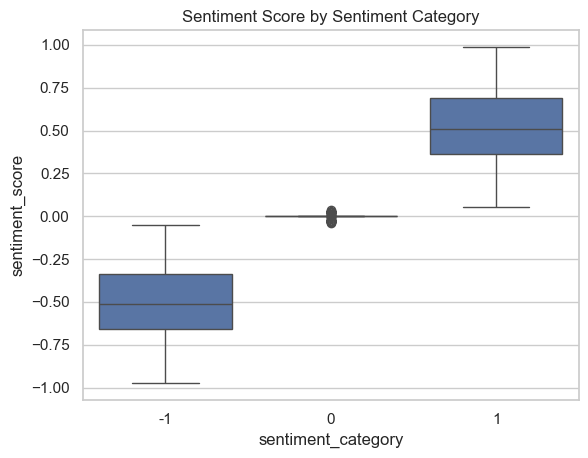

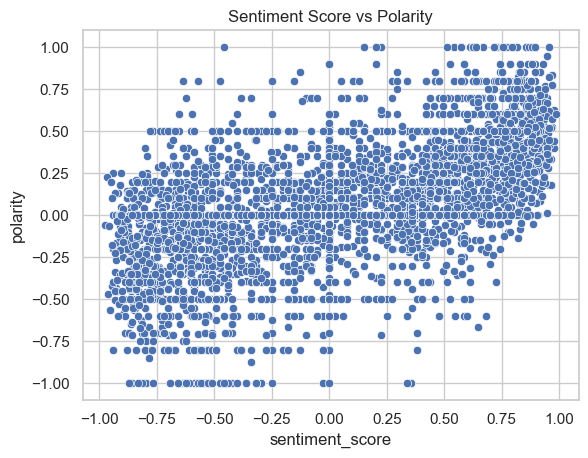

In [371]:
# Boxplot for sentiment score by sentiment category
sns.boxplot(x='sentiment_category', y='sentiment_score', data=df)
plt.title('Sentiment Score by Sentiment Category')
plt.show()

# Scatter plot for correlation between sentiment_score and polarity
sns.scatterplot(x='sentiment_score', y='polarity', data=df)
plt.title('Sentiment Score vs Polarity')
plt.show()


Numeric Columns: ['sentiment_score', 'tweet_length', 'subjectivity', 'polarity']
Categorical Columns: ['subtask_a', 'subtask_b', 'subtask_c', 'sentiment_category', 'polarity_class', 'subjectivity_class', 'topic']


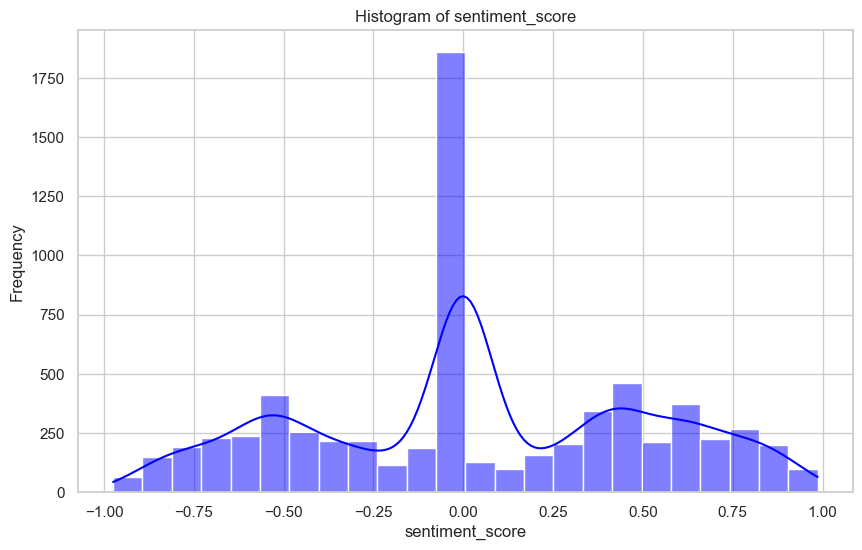

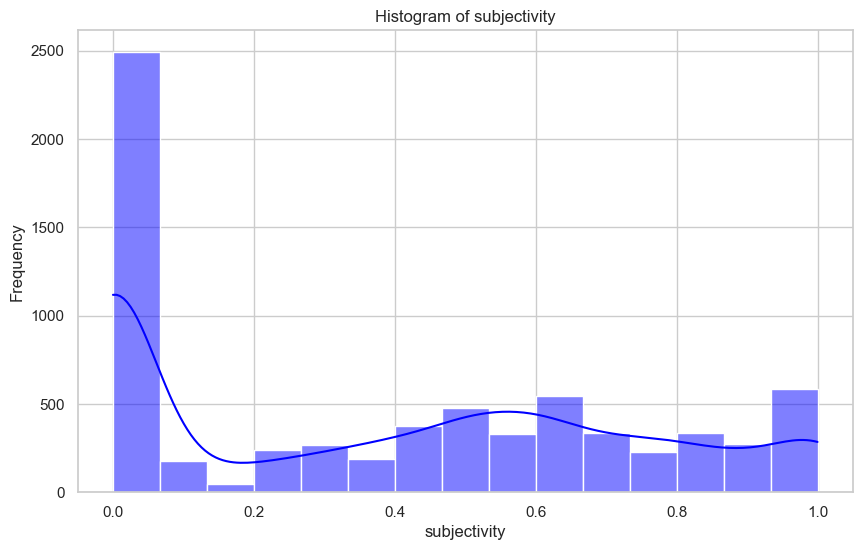

C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\529802114.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='Set2')


C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\529802114.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='Set2')


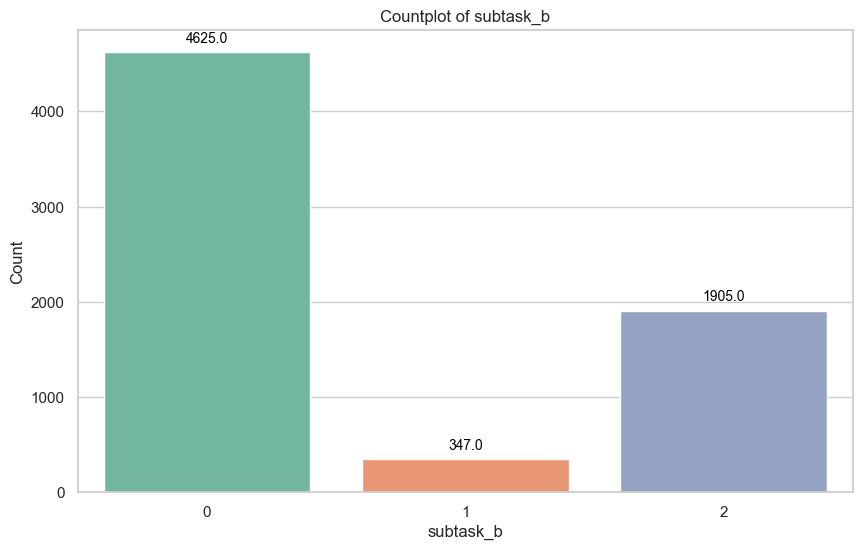

C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\529802114.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='Set2')


C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\529802114.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='Set2')


C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\529802114.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='Set2')


C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\529802114.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='Set2')


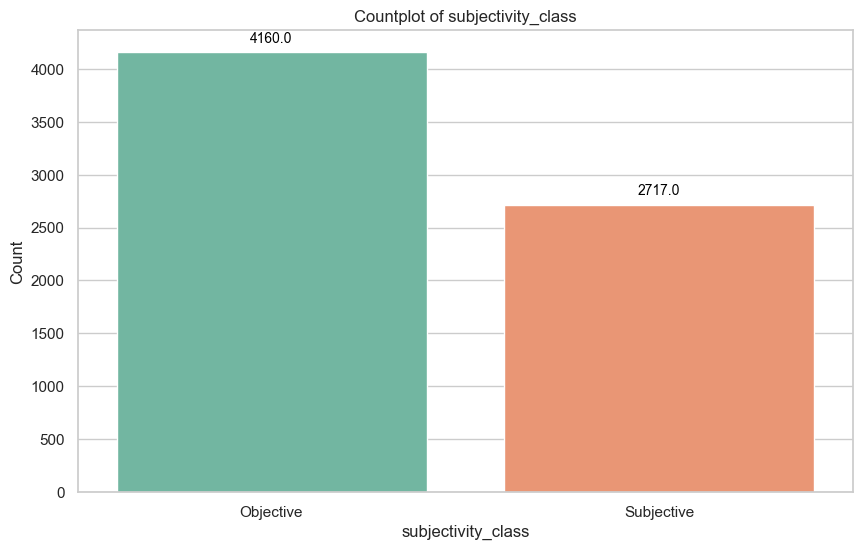

C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\529802114.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='Set2')


In [380]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of columns to loop through
categorical_columns = ['subtask_a', 'subtask_b', 'subtask_c', 'sentiment_category' 
                       , 'polarity_class', 'subjectivity_class', 'topic']
numeric_columns = ['sentiment_score', 'tweet_length', 'subjectivity', 'polarity']

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

# Loop through numeric columns and plot histograms
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.histplot(df[column].dropna(), kde=True, color='blue')  # Drop missing values for clean plot
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()  # Show the plot

# Loop through categorical columns and plot countplots with annotations
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Set figure size
    ax = sns.countplot(data=df, x=column, palette='Set2')
    
    # Adding annotations for each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 10), textcoords='offset points')

    plt.title(f"Countplot of {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()  # Show the plot


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int64  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6860 non-null   object 
 7   stopped             6857 non-null   object 
 8   stemmed_tweet       6857 non-null   object 
 9   lemmatized_tweet    6857 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   int64  
 14  polarity            6877 non-null   float64
 15  subjectivity        6877 non-null   float64
 16  polari

In [384]:
df.describe()

del            id    subtask_a    subtask_b    subtask_c  \
count   6877.000000   6877.000000  6877.000000  6877.000000  6877.000000   
mean    6607.661917  55025.164316     0.415879     0.604479     0.383016   
std     3831.291209  25952.285929     0.492909     0.890629     0.726897   
min        0.000000  10006.000000     0.000000     0.000000     0.000000   
25%     3276.000000  32384.000000     0.000000     0.000000     0.000000   
50%     6579.000000  55088.000000     0.000000     0.000000     0.000000   
75%     9918.000000  77672.000000     1.000000     2.000000     1.000000   
max    13239.000000  99950.000000     1.000000     2.000000     3.000000   

       tweet_length        topic  sentiment_score  sentiment_category  \
count   6877.000000  6877.000000      6877.000000         6877.000000   
mean      17.306238     0.972662         0.039168            0.060637   
std       13.192973     0.835413         0.475633            0.852205   
min        2.000000     0.000000        -0.974500           -1.000000   
25%        8.000000     0.000000        -0.340000           -1.000000   
50%       13.000000     1.000000         0.000000            0.000000   
75%       23.000000     2.000000         0.440400            1.000000   
max      101.000000     2.000000         0.986400            1.000000   

          polarity  subjectivity  polarity_class  combined_sentiment  
count  6877.000000   6877.000000     6877.000000         6877.000000  
mean      0.061319      0.384366        0.142649           -0.130289  
std       0.334550      0.352545        0.740959            0.847374  
min      -1.000000      0.000000       -1.000000           -1.000000  
25%       0.000000      0.000000        0.000000           -1.000000  
50%       0.000000      0.400000        0.000000            0.000000  
75%       0.212500      0.666667        1.000000            1.000000  
max       1.000000      1.000000        1.000000            1.000000